# Creating New VPatients

## Introduction
The goal of this work is to create a wider variety of patients so that we can make a larger dataset for our meal detection benchmark. We start with figuring out which variables need to be resampled from distributions with the help of copulas to preserve correlations between distributions. 

To try to clear up some confusion, these are parameters as they are used in the T1D patient model ```simglucose/patient/t1dpatient.py```, but are variables in the sense that they can be generated from a different set of underlying distributions which we are trying to infer. Some will not be regenerated if:
1. They are 0 variance,
2. Can be deterministically infered from other parameters,
3. Are not used in any simulation.

Other patient values found in ```Quest.csv``` like CR and CF must be determined through simulation using the below parameters based on the [UVA/PADOVA Type 1 Diabetes Simulator: Section 'Determination of CR and CF'](https://journals.sagepub.com/doi/10.1177/1932296813514502).

### Definitions of Parameters

Below is my attempt at describing all of the parameters in ```vpatient_params.csv```. They were infered from a combination of 2 papers and inspecting the codebase itself it the parameter names were not perfectly clear. I tried to keep them in order of appearance in the ```vpatient_params.csv```. The original Meal Simulation Model of the Glucose-Insulin System (for T2D and Normal Adults) provides a lot more detail of the parameters, there are some parameters not discussed in that paper, and I needed to get the information from the UVA/PADOVA Type 1 Diabetes Simulator: New Features paper.

1. [Meal Simulation Model of the Glucose-Insulin System](https://ieeexplore.ieee.org/abstract/document/4303268/references#references)
2. [The UVA/PADOVA Type 1 Diabetes Simulator: New Features](https://journals.sagepub.com/doi/10.1177/1932296813514502)

I would be happy if others improve, clean, or correct some of the definitions below.

#### Definitions

* BW (kg) - Body Weight 
* EGPb (mg/kg/min) - Edogenous Glucose Production, basal steady-state edogenous production, b suffix denotes basal state.
  * $EGP_b = EGP(0)$
  * $EGP(t) = k_{p1} - k_{p2} * G_{p}(t) - k_{p3} * I_{d}(t) - k_{p4} * I_{p0}(t)$
  * EGPb = Ub + Eb <- in normal subjects this is 0. $EGP_b = U_{b} + E_{b}$
  * Ub (mg/kg/min) - Glucose utilization $U(0) = U_{b}$
  * Eb (mg/kg/min) - Renal excretion $E(0) = E_{b}$
* Gb (mg/dl) - plasma Glucose concentration, b suffix denotes basal state: randomly generated from the joint distribution with an average of 120 mg/dl.  In S2008, Gb was randomly generated from the joint distribution with an average of 140 mg/dl (chosen to reflect the knowledge available to the authors at that time). 
  * Gb = Gp/Vg
  * Gp (mg/kg) - glucoses masses in plasma and glucose masses in rapidly equilibrating tissues $G_p(0) = G_{pb}$
  * Gt (mg/kg) - slowly equilibrating tissues $G_{t}(0) = G_{tb}$
  * Vg (dl/kg) - the distribution volume of glucose $V_{G}$
* Ib (pmol/l) - Insulin plasma concentration, b suffix denotes basal state. $I(0) = I_{b}$
  * Ib = Ip/Vi
  * Ip (pmol/l) - inslin masses in plasma $I_{pb} = I_{p}(0)$
  * Vi (l/kg) - distribution volume of insulin $V_{I}$
* kabs ($min^{-1}$) - Rate of appearance process, parameter - $k_{abs}$ is the rate constant of intestinal (gut) absorption 
* kmax ($min^{-1}$) - Rate of appearance process, parameter - $k_{max}$
* kmin ($min^{-1}$)- Rate of appearance process, parameter - $k_{min}$
* b (dimensionless) - Rate of appearance process, parameter
* d (dimensionless) - Rate of appearance process, parameter
* Vg (dl/kg) - Distribution volume of glucose, $V_{G}$
* Vi (l/kg) - Distribution volume of insulin, $V_{I}$
* Ipb (pmol/kg) - insulin masses in plasma, b suffix denotes basal state. $I_{pb} = I_{p}(0)$
* Vmx (mg/kg/min per pmol/l) - Utilization parameter quantifying peripheral insulin action, $V_{mx}$
* Km0 (mg/kg) - Utilization parameter 
* k2 ($min^{-1}$) - Glucose kinetics process, rate parameter (rates $G_p$ variable)
* k1 ($min^{-1}$) - Glucose kinetics process, rate parameter (rates $G_t$ variable)
* p2u ($min^{-1}$) - Utilization parameter  
* m1 ($min^{-1}$) - Insulin kenetics process, rate parameter (rates $I_l$ variables)
* m5 (min*kg/pmol) - Insulin kenetics process, rate parameter (rates )
* CL - I don't see this used in the code and no mention of it in the papers, not sure what I'm missing with this one.
* HEb (dimensionless) - Insulin kenectics process, Hepatic extraction of insulin, i.e., the insulin flux which leaves the liver irreversibly divided by the total insulin flux leaving the liver, b suffix denotes basal state.
  * $HE_b = HE(0) = -m5*S(0) + m6$
  * S (pmol/kg/min) - insulin secretion, I guess this is assumed to be 0 in T1D hence why there is no S parameter, (probably bad assumption)
  * Therefore, in T1D, $m_6$ would be redundant because $HE_b = m_6$ (based on my assumption probably not correct)
* m2 ($min^{-1}$) - Insulin kenetics rate parameter (rates $I_l$ variable)
  * $m_2 = -m_4/HE_{b}$, if assuming S = 0
  * $m_2 = (\frac{S_b}{I_{pb}}-\frac{m_4}{1-HE_{b}})*\frac{1-HE_{b}}{HE_{b}}$ 
* m4 ($min^{-1}$) - Insulin kenetics rate parameter (rates $I_p$ variable), corresponds to peripheral degradation and has been assumed linear
  * $m_4 = \frac{2}{5}*\frac{S_{b}}{I_{pb}}*(1-HE_b)$, generally
* m30 (min^{-1}) - Insulin kenetics process, This really means the initial m3 value because m3 varies over time. 
  * $m_3(0) = \frac{HE_{b}*m_{1}}{1 - HE_{b}}$
  * $m_3(t) = \frac{HE(t)*m_{1}}{1 - HE(t)}$
* Ilb (pmol/kg) - insulin masses in liver, b suffix denotes basal state. $I_{lb} = I_{l}(0)$
* ki ($mg/kg/min$) - Edogenous production process, rate parameter accounting for delay between insulin signal and insulin action
* kp2 ($min^{-1}$) - Edogenous production process, $k_{p2}$ liver (hepatic) glucose effectiveness
* kp3 ($mg/kg/min per pmol/l$) - Edogenous production process, $k_{p3}$ parameter governing amplitude of insulin action on the liver, quantifying hepatic insulin action. 
* f (dimensionless) - Rate of Appearance process, (see Variables not included)
* Gpb(mg/kg) - glucoses masses in plasma and glucose masses in rapidly equilibrating tissues, b indicates basal level.
  * $G_{pb} = G_{p}(0)$
* ke1 ($min^{-1}$) - Renal Excretion processs, used in $E(t) = k_{e1} * [G_{p}(t)-k_{e2}]$ if $G_{p}(t) > k_{e2}$, else $E(t) = 0$
* ke2 (mg/kg) - Renal Excretion processs, used in $E(t) = k_{e1} * [G_{p}(t)-k_{e2}]$ if $G_{p}(t) > k_{e2}$, else $E(t) = 0$
* Fsnc (mg/kg/min) - I believe this is a typo of $F_{cns}$ where I assume cns means central nervous system. This corresponds to glucose utilization by the brain and erythrocytes. 
  * $U_{ii}(t) = F_{cns}$
* Gtb - I do not think this is used in the codebase, $G_{tb} = G_{t}(0)$ is at basal steady state
  * $G_{tb} = \frac{F_{cns}-EGP_{b} + k_{1}*G_{pb}}{k_{2}}$
* Vm0 (mg/kg/min) - Utilization process, $V_{m0}$ maximum utilization by tissue at basal insulin
  * $V_{m0} = \frac{(EGP_{b}-F_{cns})*(K_{m0}+G_{tb})}{G_{tb}}$
* Rdb - can't find reference, not used in code base, perfectly correlates with EGPb.
* PCRb - can't find reference, not used in code base
##### Subcutaneous Insulin Kinetics
There are four equations that define insulin kinetics, the below variables define how these are calculated
* Equations from papers:
  * $\dot{I}_{sc1} = -(k_{d} + k_{a1})*I_{sc1}(t) + IIR(t)$ 
  * $I_{sc1}(0) = I_{sc1ss}$, see isclss below
  * $\dot{I}_{sc2} = k_{d}*I_{sc1}(t) - k_{a2}*I_{sc2}(t)$ 
  * $I_{sc2}(0) = I_{sc2ss}$, see isc2ss below
* kd - used in calculation of subcutaneous insulin kinetics $k_{d}$ (see above)
* ksc - used in calculation of subcutaneous glucose $k_{sc}$ (see above)
* ka1 - used in calculation of subcutaneous insulin kinetics $k_{a1}$ (see above)
* ka2 - used in calculation of subcutaneous insulin kinetics $k_{a2}$ (see above)
* doskempt - I assume this refers to $k_{empt}$ which is the rate constant of gastric emptying, which is a nonlinear function of $Q_{sto}$
  * $Q_{sto}$ (mg) - is the amount of glucose in the stomach
* u2ss - used for calculating basal insulin in ```t1dpatient.py``` see ```basal = p._params.u2ss * p._params.BW / 6000  # U/min```
* isclss - $I_{sc1}(0) = I_{sc1ss}$, the first steady state of subcutaneous insulin parameter
* isc2ss - $I_{sc2}(0) = I_{sc2ss}$, the second steady state of subcutaneous insulin parameter
* sp1 - could not find in code base
* patient_history - could not find in code base
#### x0_\# initialization Parameters
* x0_1 - In code this is used for initializing: 
  * In code: ```#Glucose in the stomach:``` 
    * ```qsto = x[0] + x[1]```, 
  * In paper: 
    * $Q_{sto}(t) = Q_{sto1}(t) + Q_{sto2}(t)$, and $Q_{sto}(0) = Q_{sto1}(0) + Q_{sto2}(0) = 0$. 
  * Therefore ```x0_1``` $=  Q_{sto1}(0)$. 
* x0_2 - In code this is used for initializing: 
  * In code: ```#Glucose in the stomach:``` 
    * ```qsto = x[0] + x[1]```, 
  * In paper: $Q_{sto}(t) = Q_{sto1}(t) + Q_{sto2}(t)$, and $Q_{sto}(0) = Q_{sto1}(0) + Q_{sto2}(0) = 0$. 
  * Therefore ```x0_2``` $=  Q_{sto2}(0)$.
* x0_3 - In code this is used for initializing:  
  * ```# Rate of appearance:``` 
    * ```Rat = params.f * params.kabs * x[2] / params.BW```, 
  * Equation 13 in paper: 
    * $Ra(t) = \frac{f*k_{abs}*Q_{gut}(t)}{BW}$. 
    * Therefore ```x0_3```$= Q_{gut}(0)$
* x0_4 - In code this is used for initializing ```# Glucose Production
        EGPt = params.kp1 - params.kp2 * x[3] - params.kp3 * x[8]```, 
    * this corresponds to eq.10 in the paper: 
      * $EGP(t) = k_{p1} - k_{p2} * G_{p}(t) - k_{p3} * I_{d}(t) - k_{p4} * I_{po}(t)$
    * Note: $I_{po}(t)$ is the amount of insulin in the portal vein, not used in simulation, therefore $k_{p4}$ is not a parameter.
    * Therefore ```x0_4```$=G_{p}(0)$, or the initialization of glucose masses in plasma (see eq.1 in paper). So it should be that: ```x0_4 == Gpb >>> True```
* x0_5 - In code this is used for initializing:
  * ```# glucose kinetics```
    * ```Uidt = Vmt * x[4] / (Kmt + x[4])```
  * this correspondos to eq.15 in the paper:
    * $U_{id}(t) = \frac{V_{m}(X(t))*G_{t}(t)}{K_{m}(X(t))+G_{t}(t)}$
  * Therefore ```x0_5```$=G_{t}(t)$, which is glucose masses in rapidly equilibrating tissues, see eq.1 in paper. So it should be that: ```x0_5 == Gtb >>> True```
* x0_6 - In code this is used for initializing (and other locations):
  * ```# insulin kinetics```
    * ```It = x[5] / params.Vi```
  * Eq.3 in paper:
    * $I(t) = \frac{I_{p}}{V_{I}}$
    * $I_{p}$ is insulin mass in plasma.
  * Therefore ```x0_6```$=I_{p}$. So it should be ```x0_6 == Ipb >>> True```
* x0_7 - In code this is used for initializing:
  * ```# insulin action on glucose utilization```
    * ```dxdt[6] = -params.p2u * x[6] + params.p2u * (It - params.Ib)```
  * Eq.18 in paper:
    * $\dot{X}(t) = -p_{2U}*X(t) + p_{2U}[I(t) - I_{b}]$
  * Therefore ```x0_7```$=X(0)$. $X(t)$ (pmol/L) is insulin in the interstitial fluid.
* x0_8 - In code this is used for initializing:
  * ```# insulin action on production```
    * ```dxdt[7] = -params.ki * (x[7] - It)```
    * ```dxdt[8] = -params.ki * (x[8] - x[7])```
  * Eq.11 in paper:
    * $\dot{I}_{1}(t) = - k_{i}*[I_{1}(t) - I(t)]$
    * $\dot{I}_{d}(t) = - k_{i}*[I_{d}(t) - I_{1}(t)]$
  * Therefore ```x0_8```$=I_{1}(0)$, both $I_{1}(0) = I_{d}(0) = I_{b}$
* x0_9 - In code this is used for initializing:
  * ```# insulin action on production```
    * ```dxdt[7] = -params.ki * (x[7] - It)```
    * ```dxdt[8] = -params.ki * (x[8] - x[7])```
  * Eq.11 in paper:
    * $\dot{I}_{1}(t) = - k_{i}*[I_{1}(t) - I(t)]$
    * $\dot{I}_{d}(t) = - k_{i}*[I_{d}(t) - I_{1}(t)]$
  * Therefore ```x0_9```$=I_{d}(0)$, both $I_{1}(0) = I_{d}(0) = I_{b}$
* x0_10 - In code this is used for initializing:
  * ```# insulin in the liver (pmol/kg)```
    * ```dxdt[9] = -(params.m1 + params.m30) * x[9] + params.m2 * x[5]```
    * ```dxdt[9] = (x[9] >= 0) * dxdt[9]```
  * Eq.3 in paper:
    * $\dot {I}_{l} (t) = - (m_{1} + m_{3} (t)) \cdot I_{l} (t) + m_{2} I_{p} (t) + S(t)$
  * Therefore ```x0_10```$=I_{l} (0)=I_{lb}=$```Ilb```
* x0_11 - In code this is used for initializing:
  * ```# subcutaneous insulin kinetics```
    * ```dxdt[10] = insulin - (params.ka1 + params.kd) * x[10]```
    * ```dxdt[10] = (x[10] >= 0) * dxdt[10]```
    * ```dxdt[11] = params.kd * x[10] - params.ka2 * x[11]```
    * ```dxdt[11] = (x[11] >= 0) * dxdt[11]```
  * Eq.A16 in [UVA/PADOVAT1D paper](https://doi.org/10.1177/1932296813514502):
    *  $\dot{I}_{sc1}(t) = -(k_{d} + k_{a1})\cdot I_{sc1} + IIR(t)$
    *  $I_{sc1}(0) = I_{sc1ss}
    *  $\dot{I}_{sc2}(t) = k_{d}\cdot I_{sc1}(t) - k_{a2}\cdot I_{sc2}$
    *  I_{sc2}(0) = I_{sc2ss}
  * Therefore ```x0_11```$=I_{sc1}(0)=I_{sc1ss}=$```isclss```  
* x0_12 - In code this is used for initializing:        
  * ```# subcutaneous insulin kinetics```
    * ```dxdt[10] = insulin - (params.ka1 + params.kd) * x[10]```
    * ```dxdt[10] = (x[10] >= 0) * dxdt[10]```
    * ```dxdt[11] = params.kd * x[10] - params.ka2 * x[11]```
    * ```dxdt[11] = (x[11] >= 0) * dxdt[11]
  * Eq.A16 in [UVA/PADOVAT1D paper](https://doi.org/10.1177/1932296813514502):
    *  $\dot{I}_{sc1}(t) = -(k_{d} + k_{a1})\cdot I_{sc1} + IIR(t)$
    *  $I_{sc1}(0) = I_{sc1ss}
    *  $\dot{I}_{sc2}(t) = k_{d}\cdot I_{sc1}(t) - k_{a2}\cdot I_{sc2}$
    *  I_{sc2}(0) = I_{sc2ss}
  * Therefore ```x0_12```$=I_{sc2}(0)=I_{sc2ss}=$```isc2ss```   
* x0_13 - In code this is used for initializing:
  * ```# subcutaneous glucose```
    * ```dxdt[12] = -params.ksc * x[12] + params.ksc * x[3]```
    * ```dxdt[12] = (x[12] >= 0) * dxdt[12]```
  * Eq.A17 in [UVA/PADOVAT1D paper](https://doi.org/10.1177/1932296813514502): 
    * $\dot{G}_{s} = -\frac{1}{T_{s}}\cdot G_{s}(t) + \frac{1}{T_{s}} \cdot G(t)$
    * $G_{s}(0) = G_{b}$ <- this one does not seem correct, but I can't find anything closer.
    * The actually correlation between ```x0_13 == Gpb```
##### Variables/Equations not included:
These variable are worth noting because the above variables directly impact below, and do not make sense without the context.
* $Ra(t)$ (mg/kg/min) - the glucose rate of apperance in plasma 
  * $Ra(t) = \frac{f*k_{abs}*Q_{gut}(t)}{BW}$
* $k_{p1}$ (mg/kg/min) - is the extrapolated EGP at zero glucose and insulin

## Data Exploration

This phase shows two things, the 0 variance columns (within patient demographic: child, adolecent, adult), and verifies the columns that can be inferred from other columns.

### Zero Variance Columns

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import sqrtm

In [2]:
# Load your data
df = pd.read_csv('/home/cjrisi/Projects/diabetes/simglucose/simglucose/params/vpatient_params.csv')
df_age_cr_cf = pd.read_csv('/home/cjrisi/Projects/diabetes/simglucose/simglucose/params/Quest.csv')
df.columns

Index(['Name', 'i', 'x0_ 1', 'x0_ 2', 'x0_ 3', 'x0_ 4', 'x0_ 5', 'x0_ 6',
       'x0_ 7', 'x0_ 8', 'x0_ 9', 'x0_10', 'x0_11', 'x0_12', 'x0_13', 'BW',
       'EGPb', 'Gb', 'Ib', 'kabs', 'kmax', 'kmin', 'b', 'd', 'Vg', 'Vi', 'Ipb',
       'Vmx', 'Km0', 'k2', 'k1', 'p2u', 'm1', 'm5', 'CL', 'HEb', 'm2', 'm4',
       'm30', 'Ilb', 'ki', 'kp2', 'kp3', 'f', 'Gpb', 'ke1', 'ke2', 'Fsnc',
       'Gtb', 'Vm0', 'Rdb', 'PCRb', 'kd', 'ksc', 'ka1', 'ka2', 'dosekempt',
       'u2ss', 'isc1ss', 'isc2ss', 'kp1', 'patient_history'],
      dtype='object')

In [3]:
# Define a function to categorize the rows
def categorize_patient(row):
    prefix = row['Name'][:5]
    if prefix in ['adult', 'adole', 'child']:
        return prefix
    else:
        return 'other'

# Apply the function to create a new column
df['category'] = df.apply(categorize_patient, axis=1)

# Separate the DataFrame into subsets
df_adult = df[df['category'] == 'adult']
df_adole = df[df['category'] == 'adole']
df_child = df[df['category'] == 'child']

In [4]:
df_adult

Name   i  x0_ 1  x0_ 2  x0_ 3       x0_ 4       x0_ 5     x0_ 6  \
10  adult#001   1      0      0      0  265.370112  162.457097  5.504327   
11  adult#002   2      0      0      0  228.744780  105.424241  4.236760   
12  adult#003   3      0      0      0  273.076440   58.508351  4.778733   
13  adult#004  42      0      0      0  284.241455  206.107512  6.649954   
14  adult#005   5      0      0      0  269.532164   85.308534  4.239642   
15  adult#006   6      0      0      0  261.839456  257.611673  7.487152   
16  adult#007   7      0      0      0  249.825220  182.033174  7.853168   
17  adult#008   8      0      0      0  225.085945  142.685395  6.781382   
18  adult#009   9      0      0      0  265.568940   73.300511  4.219397   
19  adult#010  10      0      0      0  317.320929   65.777876  4.413951   

    x0_ 7       x0_ 8  ...     ksc     ka1     ka2  dosekempt      u2ss  \
10      0  100.250000  ...  0.0766  0.0019  0.0078      90000  1.238624   
11      0  107.070000  ...  0.1043  0.0037  0.0186      90000  1.232702   
12      0  131.450000  ...  0.0932  0.0041  0.0156      90000  1.746043   
13      0   83.697165  ...  0.0776  0.0038  0.0140      90000  1.409255   
14      0   91.787000  ...  0.0898  0.0038  0.0169      90000  1.254151   
15      0  138.040000  ...  0.0536  0.0025  0.0125      90000  2.609095   
16      0  118.610000  ...  0.0958  0.0029  0.0133      90000  1.503346   
17      0  106.100000  ...  0.1519  0.0031  0.0183      90000  1.110442   
18      0  115.240000  ...  0.1216  0.0045  0.0248      90000  1.519773   
19      0   92.373000  ...  0.0893  0.0034  0.0169      90000  1.379235   

        isc1ss      isc2ss       kp1  patient_history  category  
10   72.434176  141.153779  4.731406                0     adult  
11   65.222349   53.299984  4.890818                0     adult  
12   86.011970   89.320122  4.735434                0     adult  
13   57.520631   85.048361  4.335970                0     adult  
14   67.066903   59.129992  4.152148                0     adult  
15  169.421773  174.843269  3.562132                0     adult  
16   83.519217   94.822569  4.304340                0     adult  
17   55.801128   51.227265  7.200341                0     adult  
18   73.775410   47.894520  4.336893                0     adult  
19   70.730018   67.381852  3.903563                0     adult  

[10 rows x 63 columns]

In [5]:
# Get only numeric columns
numeric_columns_adult = df_adult.select_dtypes(include=['number']).columns
numeric_columns_adole = df_adole.select_dtypes(include=['number']).columns
numeric_columns_child = df_child.select_dtypes(include=['number']).columns
# Calculate variance for each column
variances_adult = df_adult[numeric_columns_adult].var()
variances_adole = df_adole[numeric_columns_adole].var()
variances_child = df_child[numeric_columns_child].var()

# Find columns with zero variance
zero_var_columns_adult = variances_adult[variances_adult == 0].index.tolist()
zero_var_columns_adole = variances_adole[variances_adole == 0].index.tolist()
zero_var_columns_child = variances_child[variances_child == 0].index.tolist()       
# Print the list of zero variance columns
print("Zero variance adult columns:", zero_var_columns_adult)
print("Zero variance adolecent columns:", zero_var_columns_adole)
print("Zero variance child columns:", zero_var_columns_child)

Zero variance adult columns: ['x0_ 1', 'x0_ 2', 'x0_ 3', 'x0_ 7', 'f', 'ke2', 'Fsnc', 'dosekempt', 'patient_history']
Zero variance adolecent columns: ['x0_ 1', 'x0_ 2', 'x0_ 3', 'x0_ 7', 'f', 'ke2', 'Fsnc', 'dosekempt', 'patient_history']
Zero variance child columns: ['x0_ 1', 'x0_ 2', 'x0_ 3', 'x0_ 7', 'f', 'ke2', 'Fsnc', 'dosekempt', 'patient_history']


**NOTICE: HEb and ke1 below**
These should be zero variance columns as well, but there seems to be some numerical issue that I can't identify.

In [6]:
variances_adult[variances_adult < 0.001]

x0_ 1              0.000000e+00
x0_ 2              0.000000e+00
x0_ 3              0.000000e+00
x0_ 7              0.000000e+00
kmax               1.315449e-04
kmin               1.629925e-05
Vi                 1.995349e-04
k1                 3.558598e-04
p2u                1.159674e-04
m5                 2.268533e-04
HEb                1.369550e-32
m4                 8.662915e-04
ki                 1.702451e-05
kp2                3.372723e-06
kp3                3.181925e-05
f                  0.000000e+00
ke1                1.306105e-38
ke2                0.000000e+00
Fsnc               0.000000e+00
PCRb               5.078433e-06
kd                 3.959556e-06
ksc                7.165534e-04
ka1                6.112222e-07
ka2                2.020900e-05
dosekempt          0.000000e+00
patient_history    0.000000e+00
dtype: float64

In [7]:
df_adult['HEb']

10    0.6
11    0.6
12    0.6
13    0.6
14    0.6
15    0.6
16    0.6
17    0.6
18    0.6
19    0.6
Name: HEb, dtype: float64

In [8]:
zero_var_columns_adult.append('HEb')
zero_var_columns_adole.append('HEb')
zero_var_columns_child.append('HEb')

In [9]:
df_adult['ke1']

10    0.0005
11    0.0005
12    0.0005
13    0.0005
14    0.0005
15    0.0005
16    0.0005
17    0.0005
18    0.0005
19    0.0005
Name: ke1, dtype: float64

In [10]:
zero_var_columns_adult.append('ke1')
zero_var_columns_adole.append('ke1')
zero_var_columns_child.append('ke1')

The zero variance columns are consistent between all demographics, they can be dropped and readded to the larger vpatient parameter dataset we are creating at the end of the analysis, as well as the non-numeric columns. You can verify the 0 var columns from the next cell:

In [11]:
df_adole[zero_var_columns_adult]

x0_ 1  x0_ 2  x0_ 3  x0_ 7    f  ke2  Fsnc  dosekempt  patient_history  \
0      0      0      0      0  0.9  339     1      90000                0   
1      0      0      0      0  0.9  339     1      90000                0   
2      0      0      0      0  0.9  339     1      90000                0   
3      0      0      0      0  0.9  339     1      90000                0   
4      0      0      0      0  0.9  339     1      90000                0   
5      0      0      0      0  0.9  339     1      90000                0   
6      0      0      0      0  0.9  339     1      90000                0   
7      0      0      0      0  0.9  339     1      90000                0   
8      0      0      0      0  0.9  339     1      90000                0   
9      0      0      0      0  0.9  339     1      90000                0   

   HEb     ke1  
0  0.6  0.0005  
1  0.6  0.0005  
2  0.6  0.0005  
3  0.6  0.0005  
4  0.6  0.0005  
5  0.6  0.0005  
6  0.6  0.0005  
7  0.6  0.0005  
8  0.6  0.0005  
9  0.6  0.0005

In [12]:
non_numeric_columns_adult = df_adult.select_dtypes(exclude=['number']).columns
df_adole[non_numeric_columns_adult]

print("We can drop: ", len(zero_var_columns_adult) + len(non_numeric_columns_adult), " columns due to non-numeric or zero variance")
# Drop the zero variance columns

We can drop:  13  columns due to non-numeric or zero variance


### Testing Calculated Parameters

In [13]:
def print_diff_stats(vec1, vec2):
    """
    Print the mean and standard deviation of the difference between two vectors.
    """
    diff = vec1 - vec2
    print(f"Mean of differences: {np.mean(diff)}")
    print(f"Standard deviation of differences: {np.std(diff)}")
    print(f"Max of differences: {np.max(diff)}")
    print(f"Min of differences: {np.min(diff)}")
    print(f"Mean of vector 1: {np.mean(vec1)}")
    print(f"Mean of vector 2: {np.mean(vec2)}")
    print(f"Standard deviation of vector 1: {np.std(vec1)}")
    print(f"Standard deviation of vector 2: {np.std(vec2)}")
    
calculated_columns = []

In [14]:
print_diff_stats(df['EGPb'], df['Rdb'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 2.8729343713000004
Mean of vector 2: 2.8729343713000004
Standard deviation of vector 1: 0.533979542436292
Standard deviation of vector 2: 0.533979542436292


In [15]:
calculated_columns.append('Rdb')

In [16]:
# Gb = Gpb/Vg
Gb_test = df['Gpb'] / df['Vg']
print_diff_stats(df['Gb'], Gb_test)

Mean of differences: 1.1818694171476333e-11
Standard deviation of differences: 6.020765645851168e-11
Max of differences: 1.7891466086439323e-10
Min of differences: -1.099635937862331e-10
Mean of vector 1: 141.86503078666667
Mean of vector 2: 141.86503078665484
Standard deviation of vector 1: 5.801706109600821
Standard deviation of vector 2: 5.801706109611955


In [17]:
calculated_columns.append('Gb')

In [18]:
# Ib = Ipb/Vi
Ib_test = df['Ipb'] / df['Vi']
print_diff_stats(df['Ib'], Ib_test)

Mean of differences: 8.117240213323385e-12
Standard deviation of differences: 2.885539680203625e-11
Max of differences: 7.143796665332047e-11
Min of differences: -6.227196536201518e-11
Mean of vector 1: 106.60197373000001
Mean of vector 2: 106.60197372999188
Standard deviation of vector 1: 12.775575367852618
Standard deviation of vector 2: 12.775575367849319


In [19]:
calculated_columns.append('Ib')

In [20]:
# m30_test
m30_test = (df['HEb']*df['m1'])/(1-df['HEb'])
print_diff_stats(df['m30'],m30_test)

Mean of differences: 3.053113317719181e-17
Standard deviation of differences: 3.6787046283387556e-17
Max of differences: 1.1102230246251565e-16
Min of differences: -2.7755575615628914e-17
Mean of vector 1: 0.30535103645
Mean of vector 2: 0.30535103645
Standard deviation of vector 1: 0.11420704602999524
Standard deviation of vector 2: 0.11420704602999522


In [21]:
calculated_columns.append('m30')

In [22]:
# df['Sb'] Calculation
Sb_test = df['m4']*(5/2)*df['Ipb']/(1-df['HEb']) 
Sb_test          

0     3.042439
1     4.495749
2     3.615665
3     4.406582
4     3.836613
5     4.819696
6     5.122869
7     3.383104
8     3.454663
9     4.152726
10    3.096561
11    3.081756
12    4.365107
13    3.523139
14    3.135378
15    6.522738
16    3.758365
17    2.776106
18    3.799434
19    3.448088
20    2.855509
21    3.461754
22    1.750964
23    3.465272
24    3.407972
25    2.463718
26    2.564804
27    3.581832
28    2.753886
29    2.822280
dtype: float64

In [23]:
# m2 test
m2_test = (Sb_test/df['Ipb'] - df['m4']/(1-df['HEb']))*(1-df['HEb'])/df['HEb']
print_diff_stats(df['m2'],m2_test)

Mean of differences: -6.666241632776368e-14
Standard deviation of differences: 5.698358134486288e-13
Max of differences: 9.999223671286472e-13
Min of differences: -1.500022328571049e-12
Mean of vector 1: 0.26624676730140007
Mean of vector 2: 0.2662467673014667
Standard deviation of vector 1: 0.08209172521568038
Standard deviation of vector 2: 0.0820917252157014


In [24]:
calculated_columns.append('m2')

In [25]:
# Gtb test
Gtb_test = (df['Fsnc']-df['EGPb']+df['k1']*df['Gpb'])/(df['k2'])
print_diff_stats(df['Gtb'], Gtb_test)

Mean of differences: -6.626024173783662e-11
Standard deviation of differences: 2.421933380806557e-10
Max of differences: 6.066898095014039e-10
Min of differences: -5.637161848426331e-10
Mean of vector 1: 158.76695625785996
Mean of vector 2: 158.76695625792624
Standard deviation of vector 1: 99.08524215882811
Standard deviation of vector 2: 99.0852421588527


In [26]:
calculated_columns.append('Gtb')

In [27]:
# Vm0 test
Vm0_test = (df['EGPb']-df['Fsnc'])*(df['Km0']+df['Gtb'])/df['Gtb']
print_diff_stats(df['Vm0'],Vm0_test)

Mean of differences: -1.1243894704193736e-12
Standard deviation of differences: 1.3980775556387382e-11
Max of differences: 6.346567715809215e-11
Min of differences: -2.3511859126301715e-11
Mean of vector 1: 5.725493312813668
Mean of vector 2: 5.725493312814792
Standard deviation of vector 1: 2.6280682932829813
Standard deviation of vector 2: 2.628068293278807


In [28]:
calculated_columns.append('Vm0')

In [29]:
# Gpb == x0 _4 test
print_diff_stats(df['Gpb'], df['x0_ 4'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 262.8236495466666
Mean of vector 2: 262.8236495466666
Standard deviation of vector 1: 23.97068987713592
Standard deviation of vector 2: 23.97068987713592


In [30]:
calculated_columns.append('x0_ 4')

In [31]:
# Gtb == x0 _5 test
print_diff_stats(df['Gtb'], df['x0_ 5'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 158.76695625785996
Mean of vector 2: 158.76695625785996
Standard deviation of vector 1: 99.08524215882811
Standard deviation of vector 2: 99.08524215882811


In [32]:
calculated_columns.append('x0_ 5')

In [33]:
# Ipb == x0 _6 test
print_diff_stats(df['Ipb'], df['x0_ 6'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 5.626814126978333
Mean of vector 2: 5.626814126978333
Standard deviation of vector 1: 1.3164904506251873
Standard deviation of vector 2: 1.3164904506251873


In [34]:
calculated_columns.append('x0_ 6')

In [35]:
print_diff_stats(df['Ib'], df['x0_ 8'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 106.60197373000001
Mean of vector 2: 106.60197373000001
Standard deviation of vector 1: 12.775575367852618
Standard deviation of vector 2: 12.775575367852618


In [36]:
calculated_columns.append('x0_ 8')

In [37]:
print_diff_stats(df['Ib'], df['x0_ 9'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 106.60197373000001
Mean of vector 2: 106.60197373000001
Standard deviation of vector 1: 12.775575367852618
Standard deviation of vector 2: 12.775575367852618


In [38]:
calculated_columns.append('x0_ 9')

In [39]:
print_diff_stats(df['Ilb'], df['x0_10'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 3.1472774259996665
Mean of vector 2: 3.1472774259996665
Standard deviation of vector 1: 1.2793236057724364
Standard deviation of vector 2: 1.2793236057724364


In [40]:
calculated_columns.append('x0_10')

In [41]:
print_diff_stats(df['isc1ss'], df['x0_11'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 72.87903766149333
Mean of vector 2: 72.87903766149333
Standard deviation of vector 1: 23.37742732003862
Standard deviation of vector 2: 23.37742732003862


In [42]:
calculated_columns.append('x0_11')

In [43]:
print_diff_stats(df['isc2ss'], df['x0_12'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 75.04002926616667
Mean of vector 2: 75.04002926616667
Standard deviation of vector 1: 33.714551050734464
Standard deviation of vector 2: 33.714551050734464


In [44]:
calculated_columns.append('x0_12')

In [45]:
print_diff_stats(df['Gpb'], df['x0_13'])

Mean of differences: 0.0
Standard deviation of differences: 0.0
Max of differences: 0.0
Min of differences: 0.0
Mean of vector 1: 262.8236495466666
Mean of vector 2: 262.8236495466666
Standard deviation of vector 1: 23.97068987713592
Standard deviation of vector 2: 23.97068987713592


In [46]:
calculated_columns.append('x0_13')

In [47]:
print("Calculated columns: ", calculated_columns)
print("Zero variance columns: ", zero_var_columns_adult) 
print("Non-numeric columns: ", non_numeric_columns_adult)

Calculated columns:  ['Rdb', 'Gb', 'Ib', 'm30', 'm2', 'Gtb', 'Vm0', 'x0_ 4', 'x0_ 5', 'x0_ 6', 'x0_ 8', 'x0_ 9', 'x0_10', 'x0_11', 'x0_12', 'x0_13']
Zero variance columns:  ['x0_ 1', 'x0_ 2', 'x0_ 3', 'x0_ 7', 'f', 'ke2', 'Fsnc', 'dosekempt', 'patient_history', 'HEb', 'ke1']
Non-numeric columns:  Index(['Name', 'category'], dtype='object')


In [48]:
all_columns = df.columns.tolist()
all_columns.remove('i')
covariance_analysis_columns = [col for col in all_columns if 
                               col not in zero_var_columns_adult and 
                               col not in non_numeric_columns_adult and 
                               col not in calculated_columns]
print("Covariance analysis columns: ", covariance_analysis_columns)
print("Total columns: ", len(all_columns))
print("Covariance analysis columns: ", len(covariance_analysis_columns))

Covariance analysis columns:  ['BW', 'EGPb', 'kabs', 'kmax', 'kmin', 'b', 'd', 'Vg', 'Vi', 'Ipb', 'Vmx', 'Km0', 'k2', 'k1', 'p2u', 'm1', 'm5', 'CL', 'm4', 'Ilb', 'ki', 'kp2', 'kp3', 'Gpb', 'PCRb', 'kd', 'ksc', 'ka1', 'ka2', 'u2ss', 'isc1ss', 'isc2ss', 'kp1']
Total columns:  62
Covariance analysis columns:  33


'BW', 'EGPb', 'Gb', 'Ib', 'kabs', 'kmax', 'kmin', 'b', 'd', 'Vg', 'Vi',
       'Ipb', 'Vmx', 'Km0', 'k2', 'k1', 'p2u', 'm1', 'm5', 'CL', 'HEb', 'm2',
       'm4', 'm30', 'Ilb', 'ki', 'kp2', 'kp3', 'f', 'Gpb', 'ke1', 'ke2',
       'Fsnc', 'Gtb', 'Vm0', 'Rdb', 'PCRb', 'kd', 'ksc', 'ka1', 'ka2',
       'dosekempt', 'u2ss', 'isc1ss', 'isc2ss', 'kp1', 'patient_history']

## Correlation of Remaining Parameters

In [49]:
corr_adult = df_adult[covariance_analysis_columns].corr()
corr_adole = df_adole[covariance_analysis_columns].corr()
corr_child = df_child[covariance_analysis_columns].corr()

### Correlations For Adults

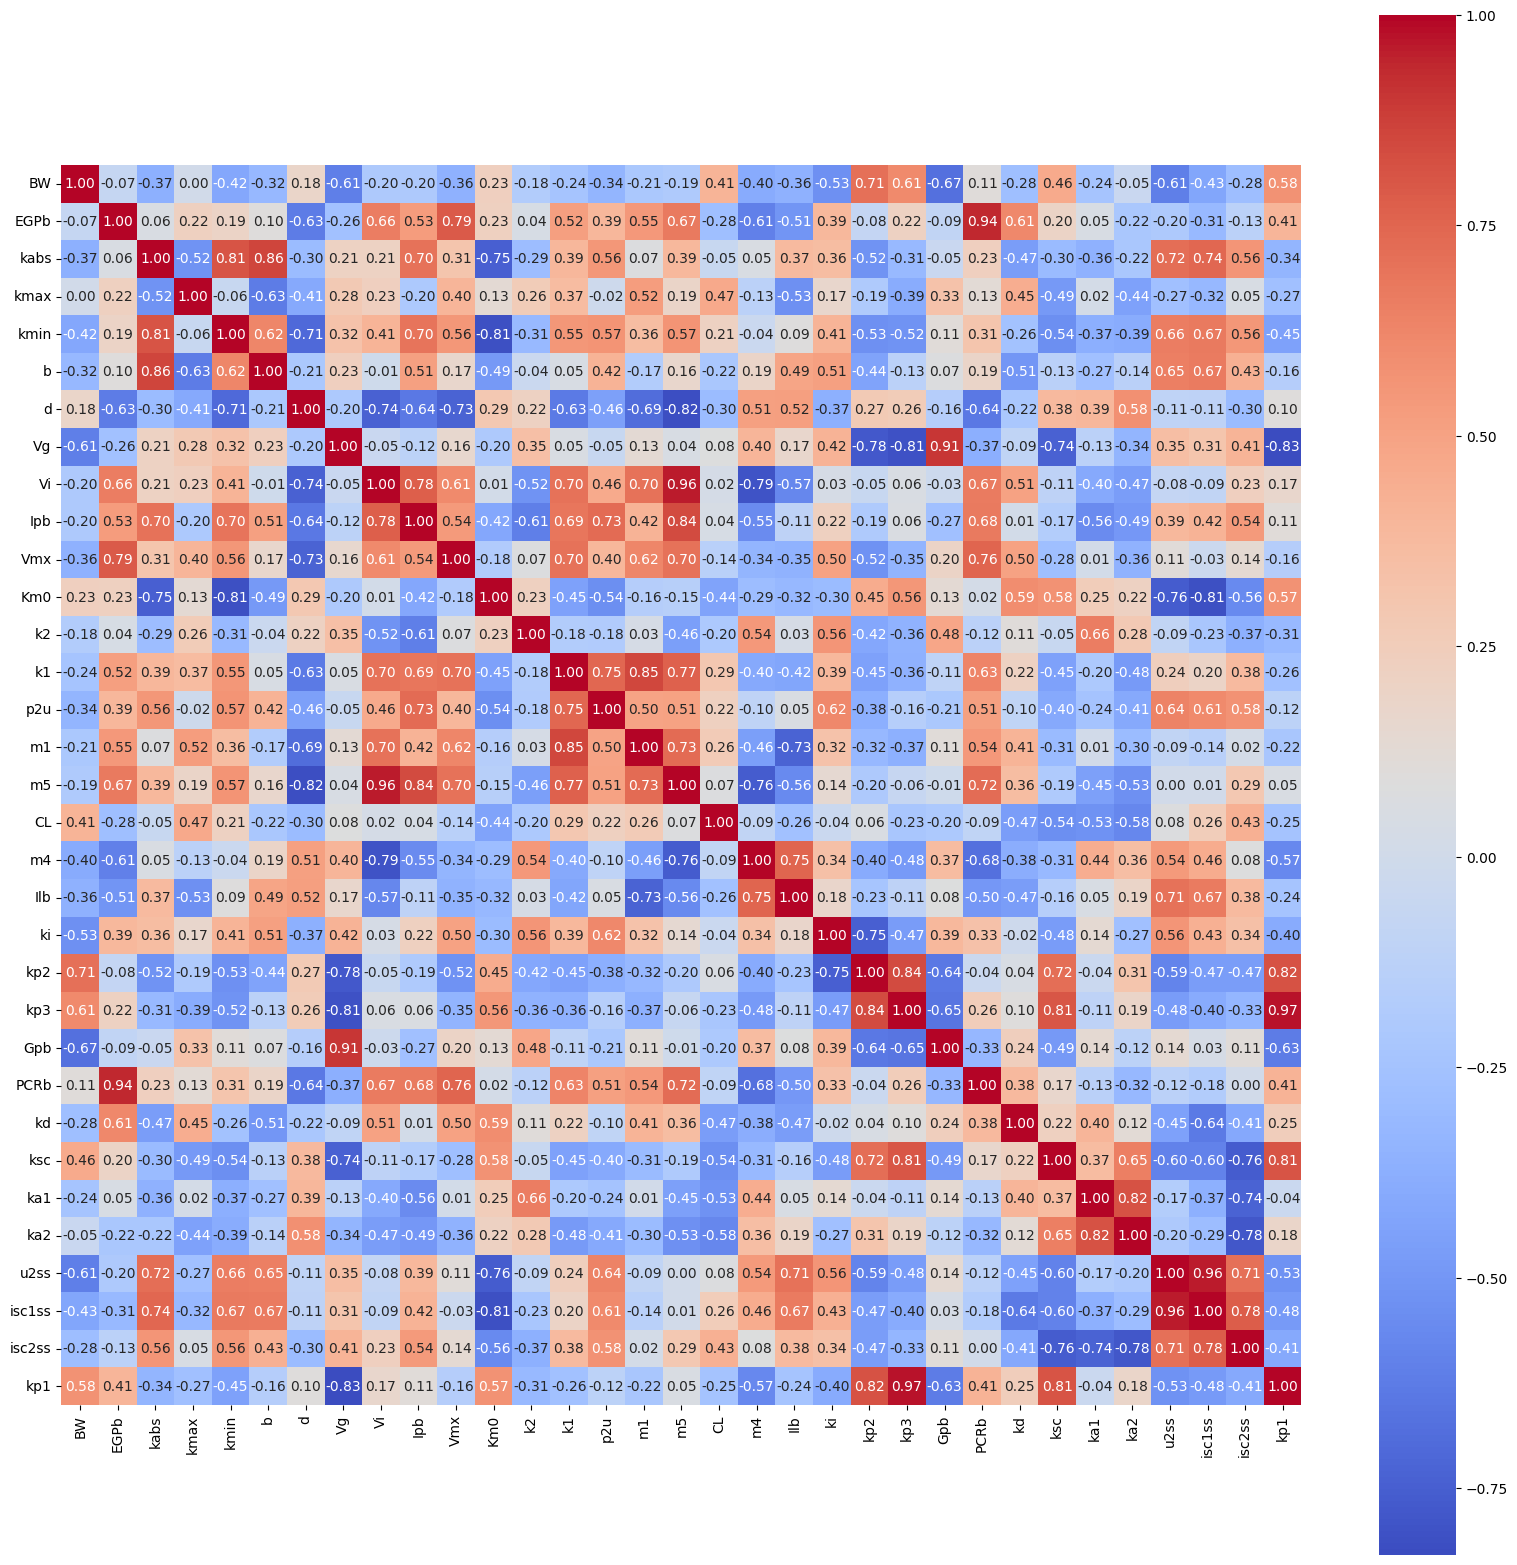

In [50]:
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(corr_adult, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

### Correlations for Adolescents

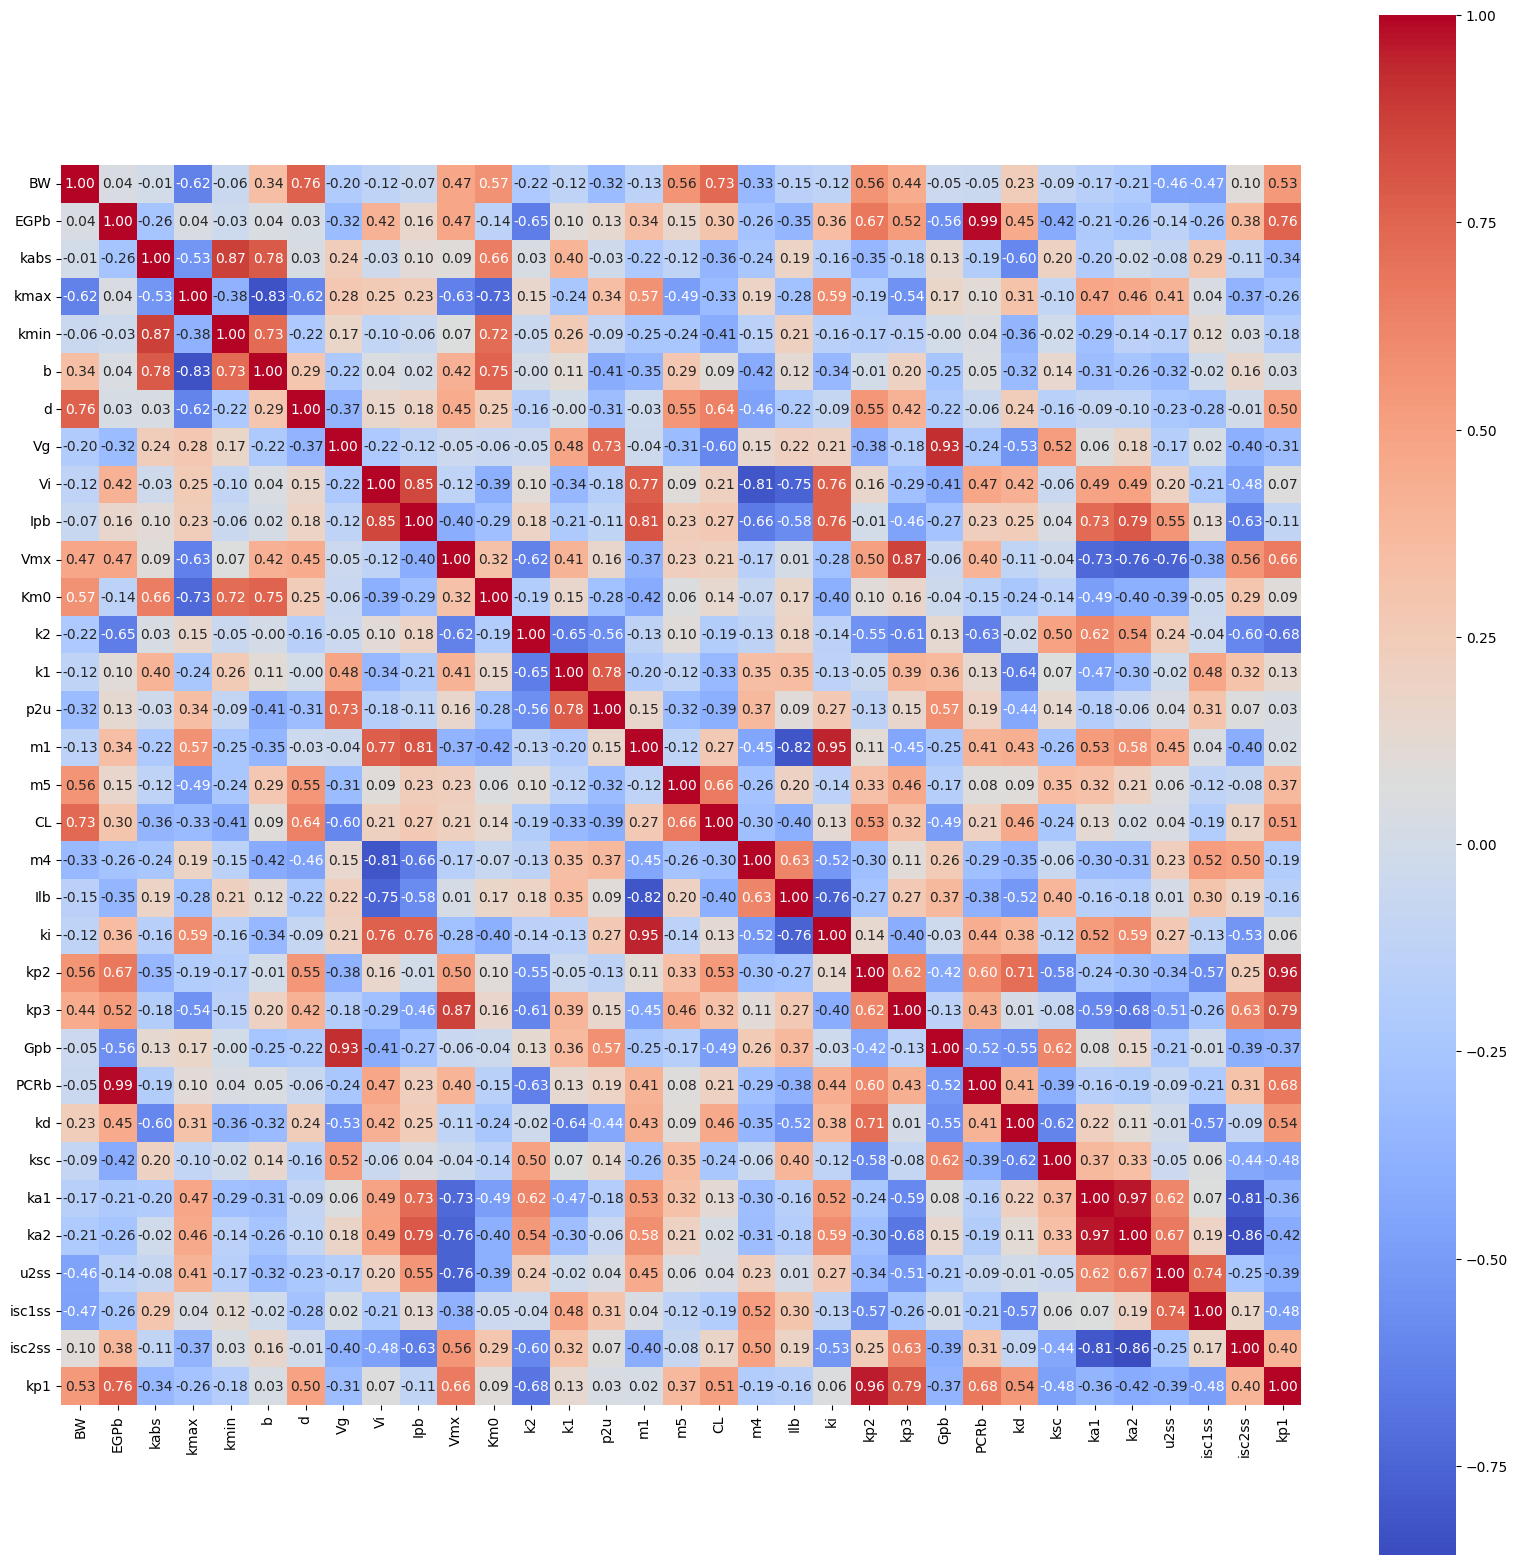

In [51]:
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(corr_adole, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

### Correlations for Children

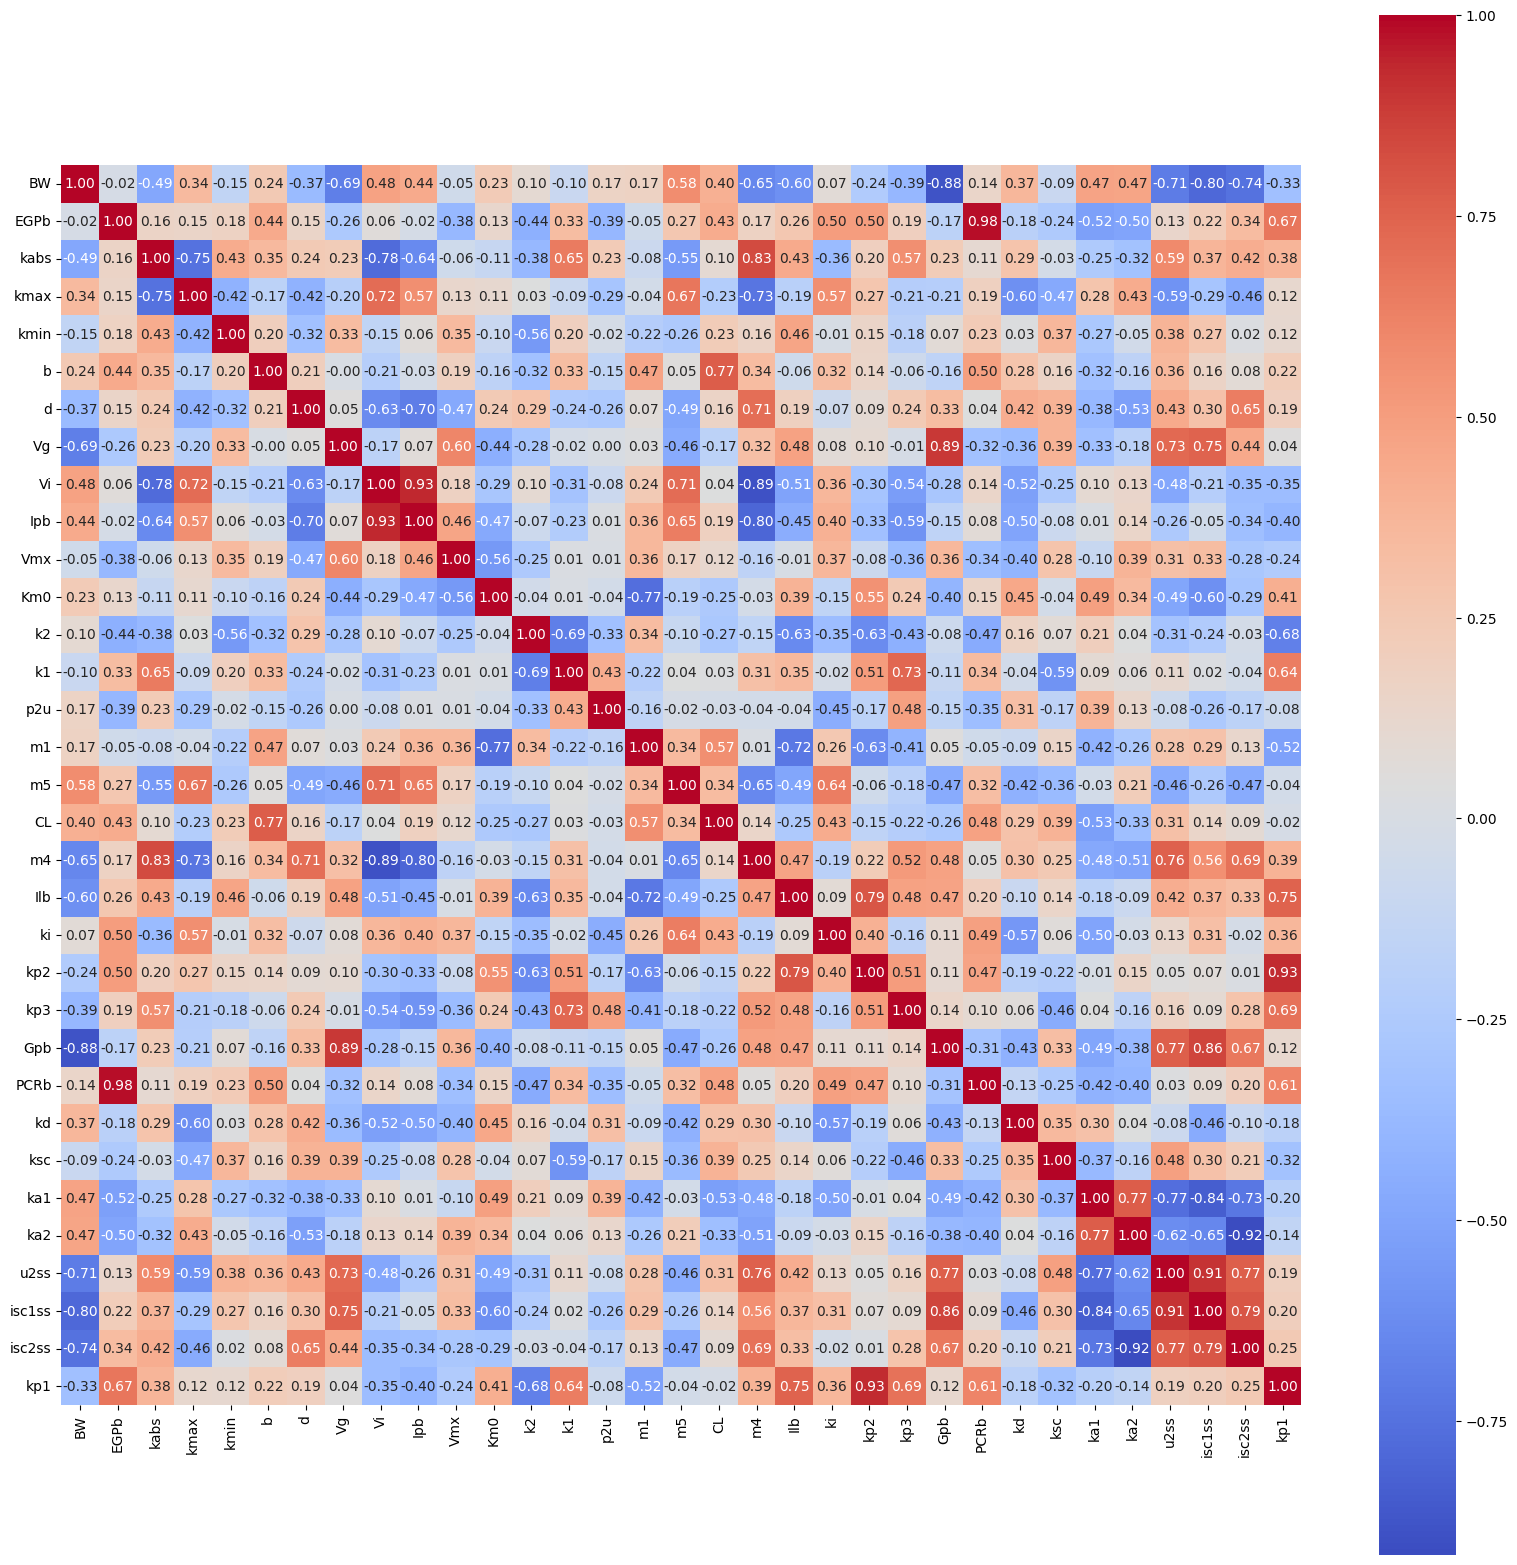

In [52]:
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(corr_child, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

## Visualizing Parameters' Distributions

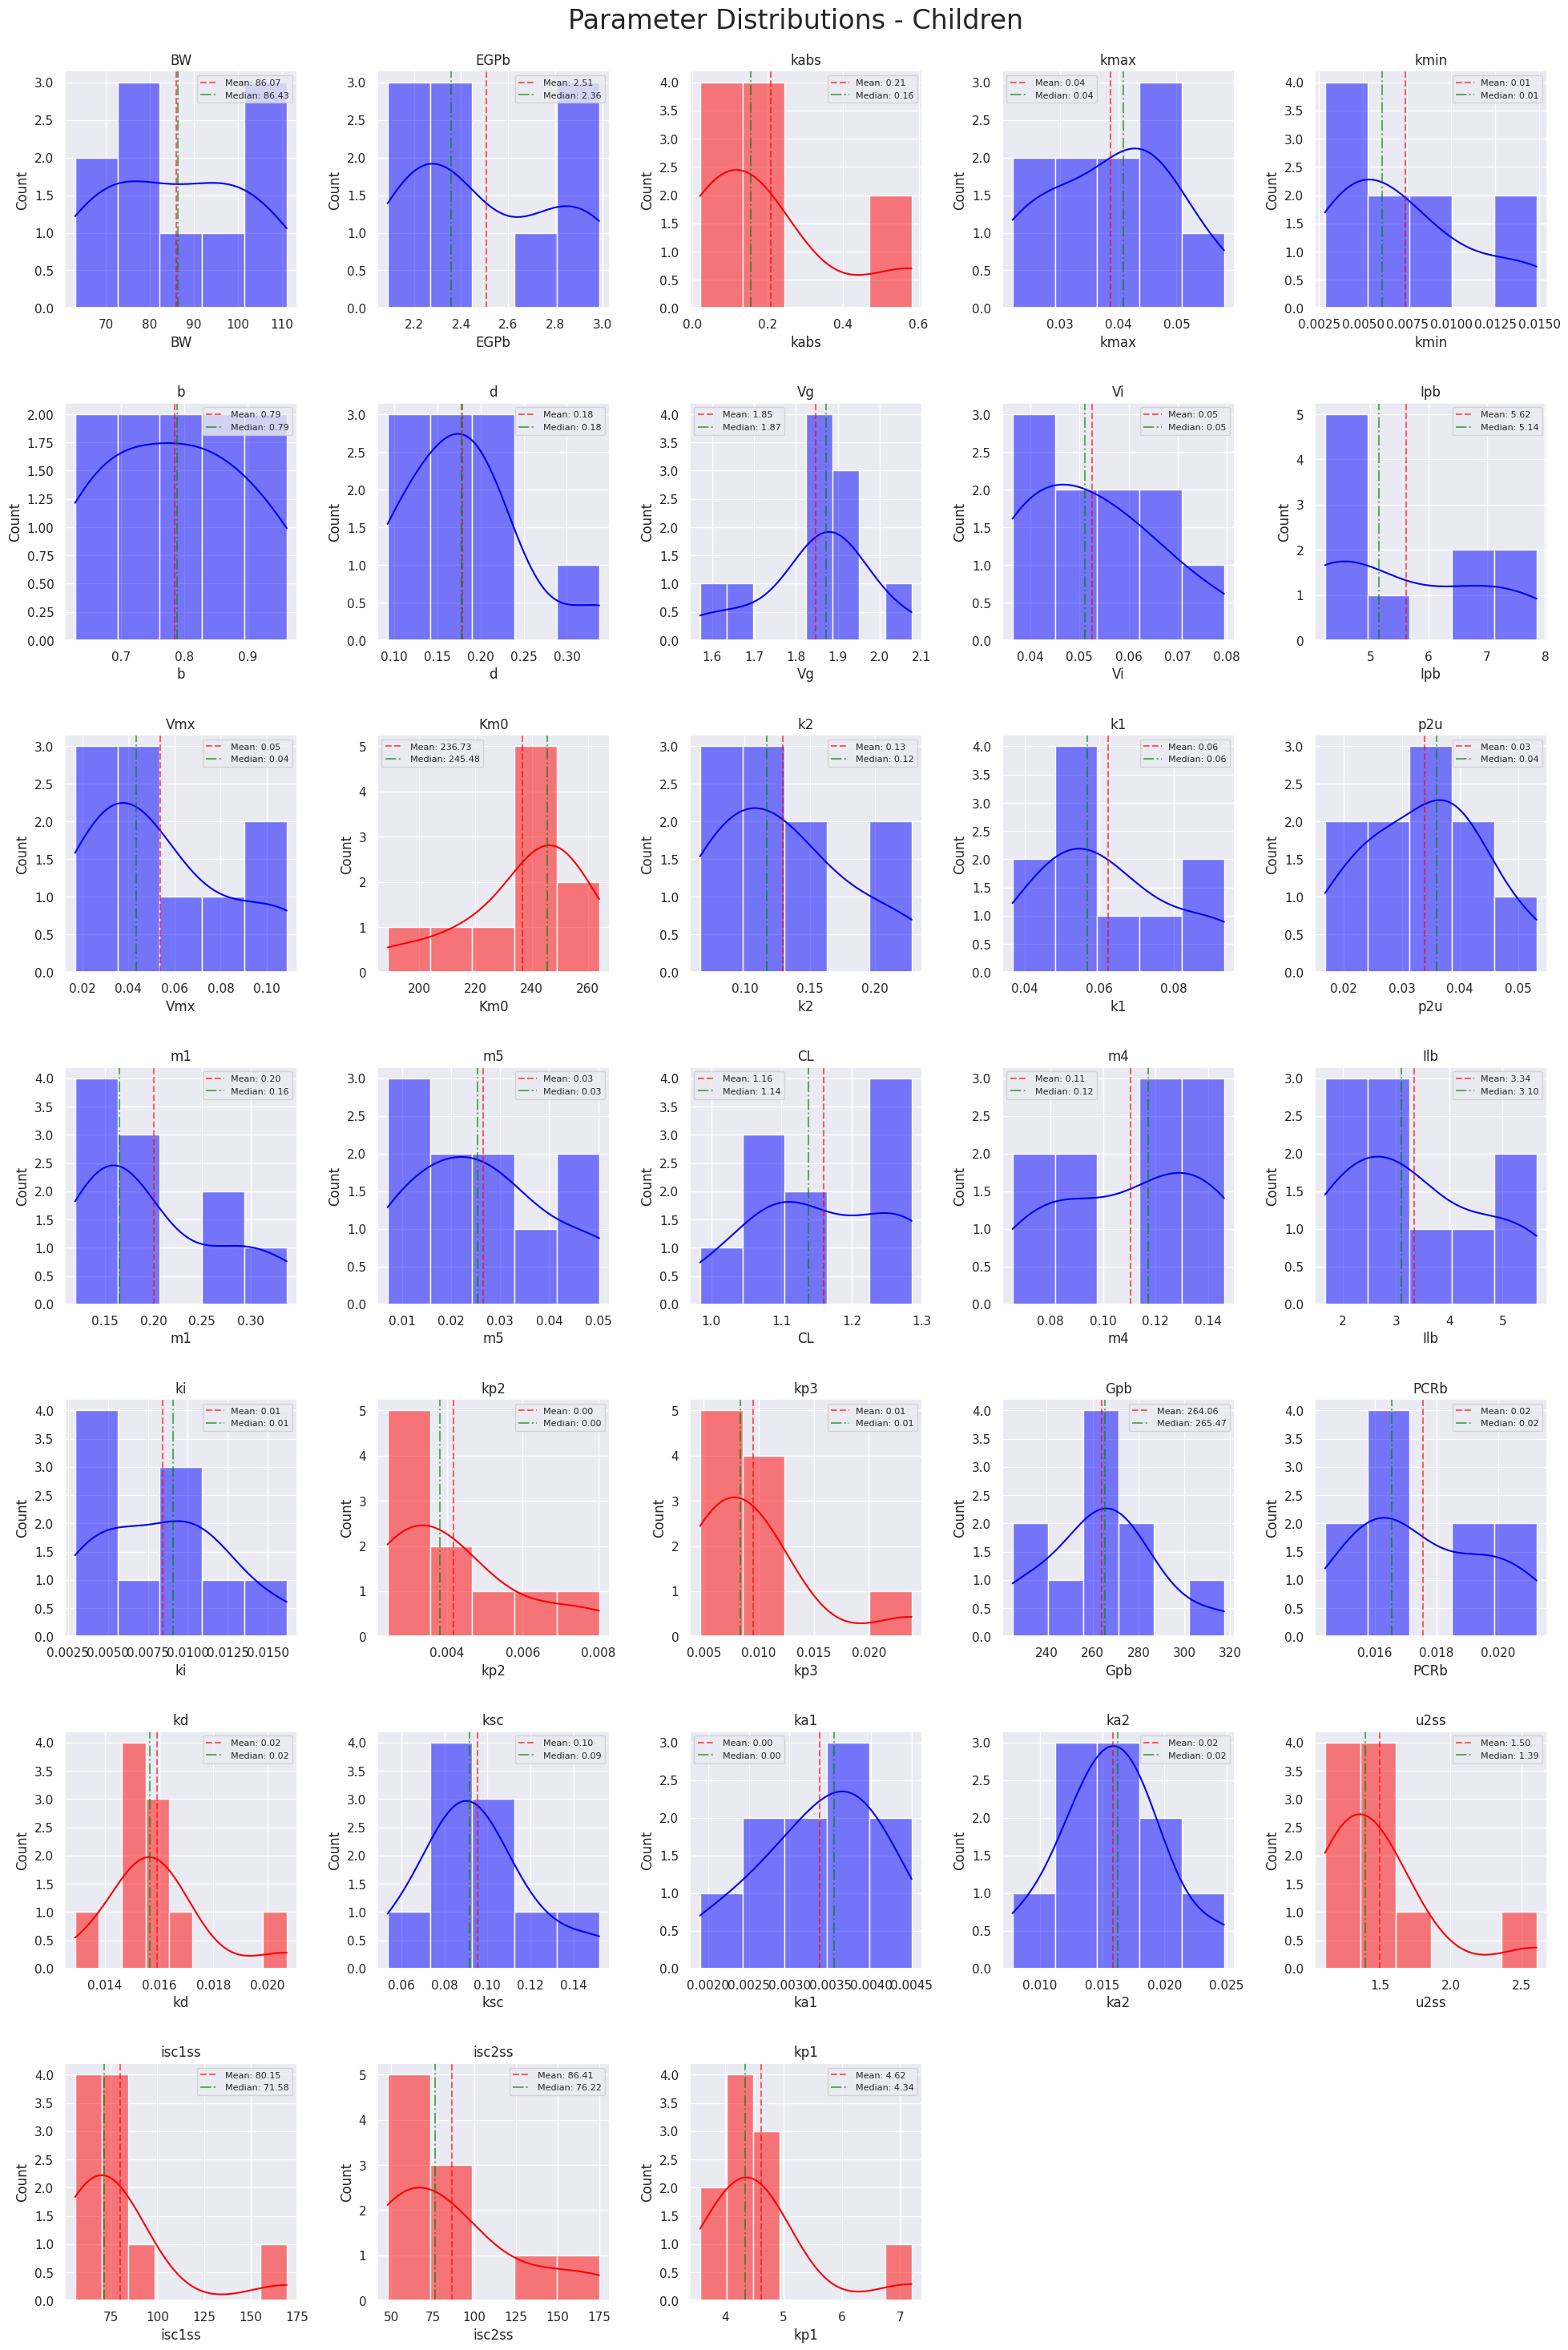

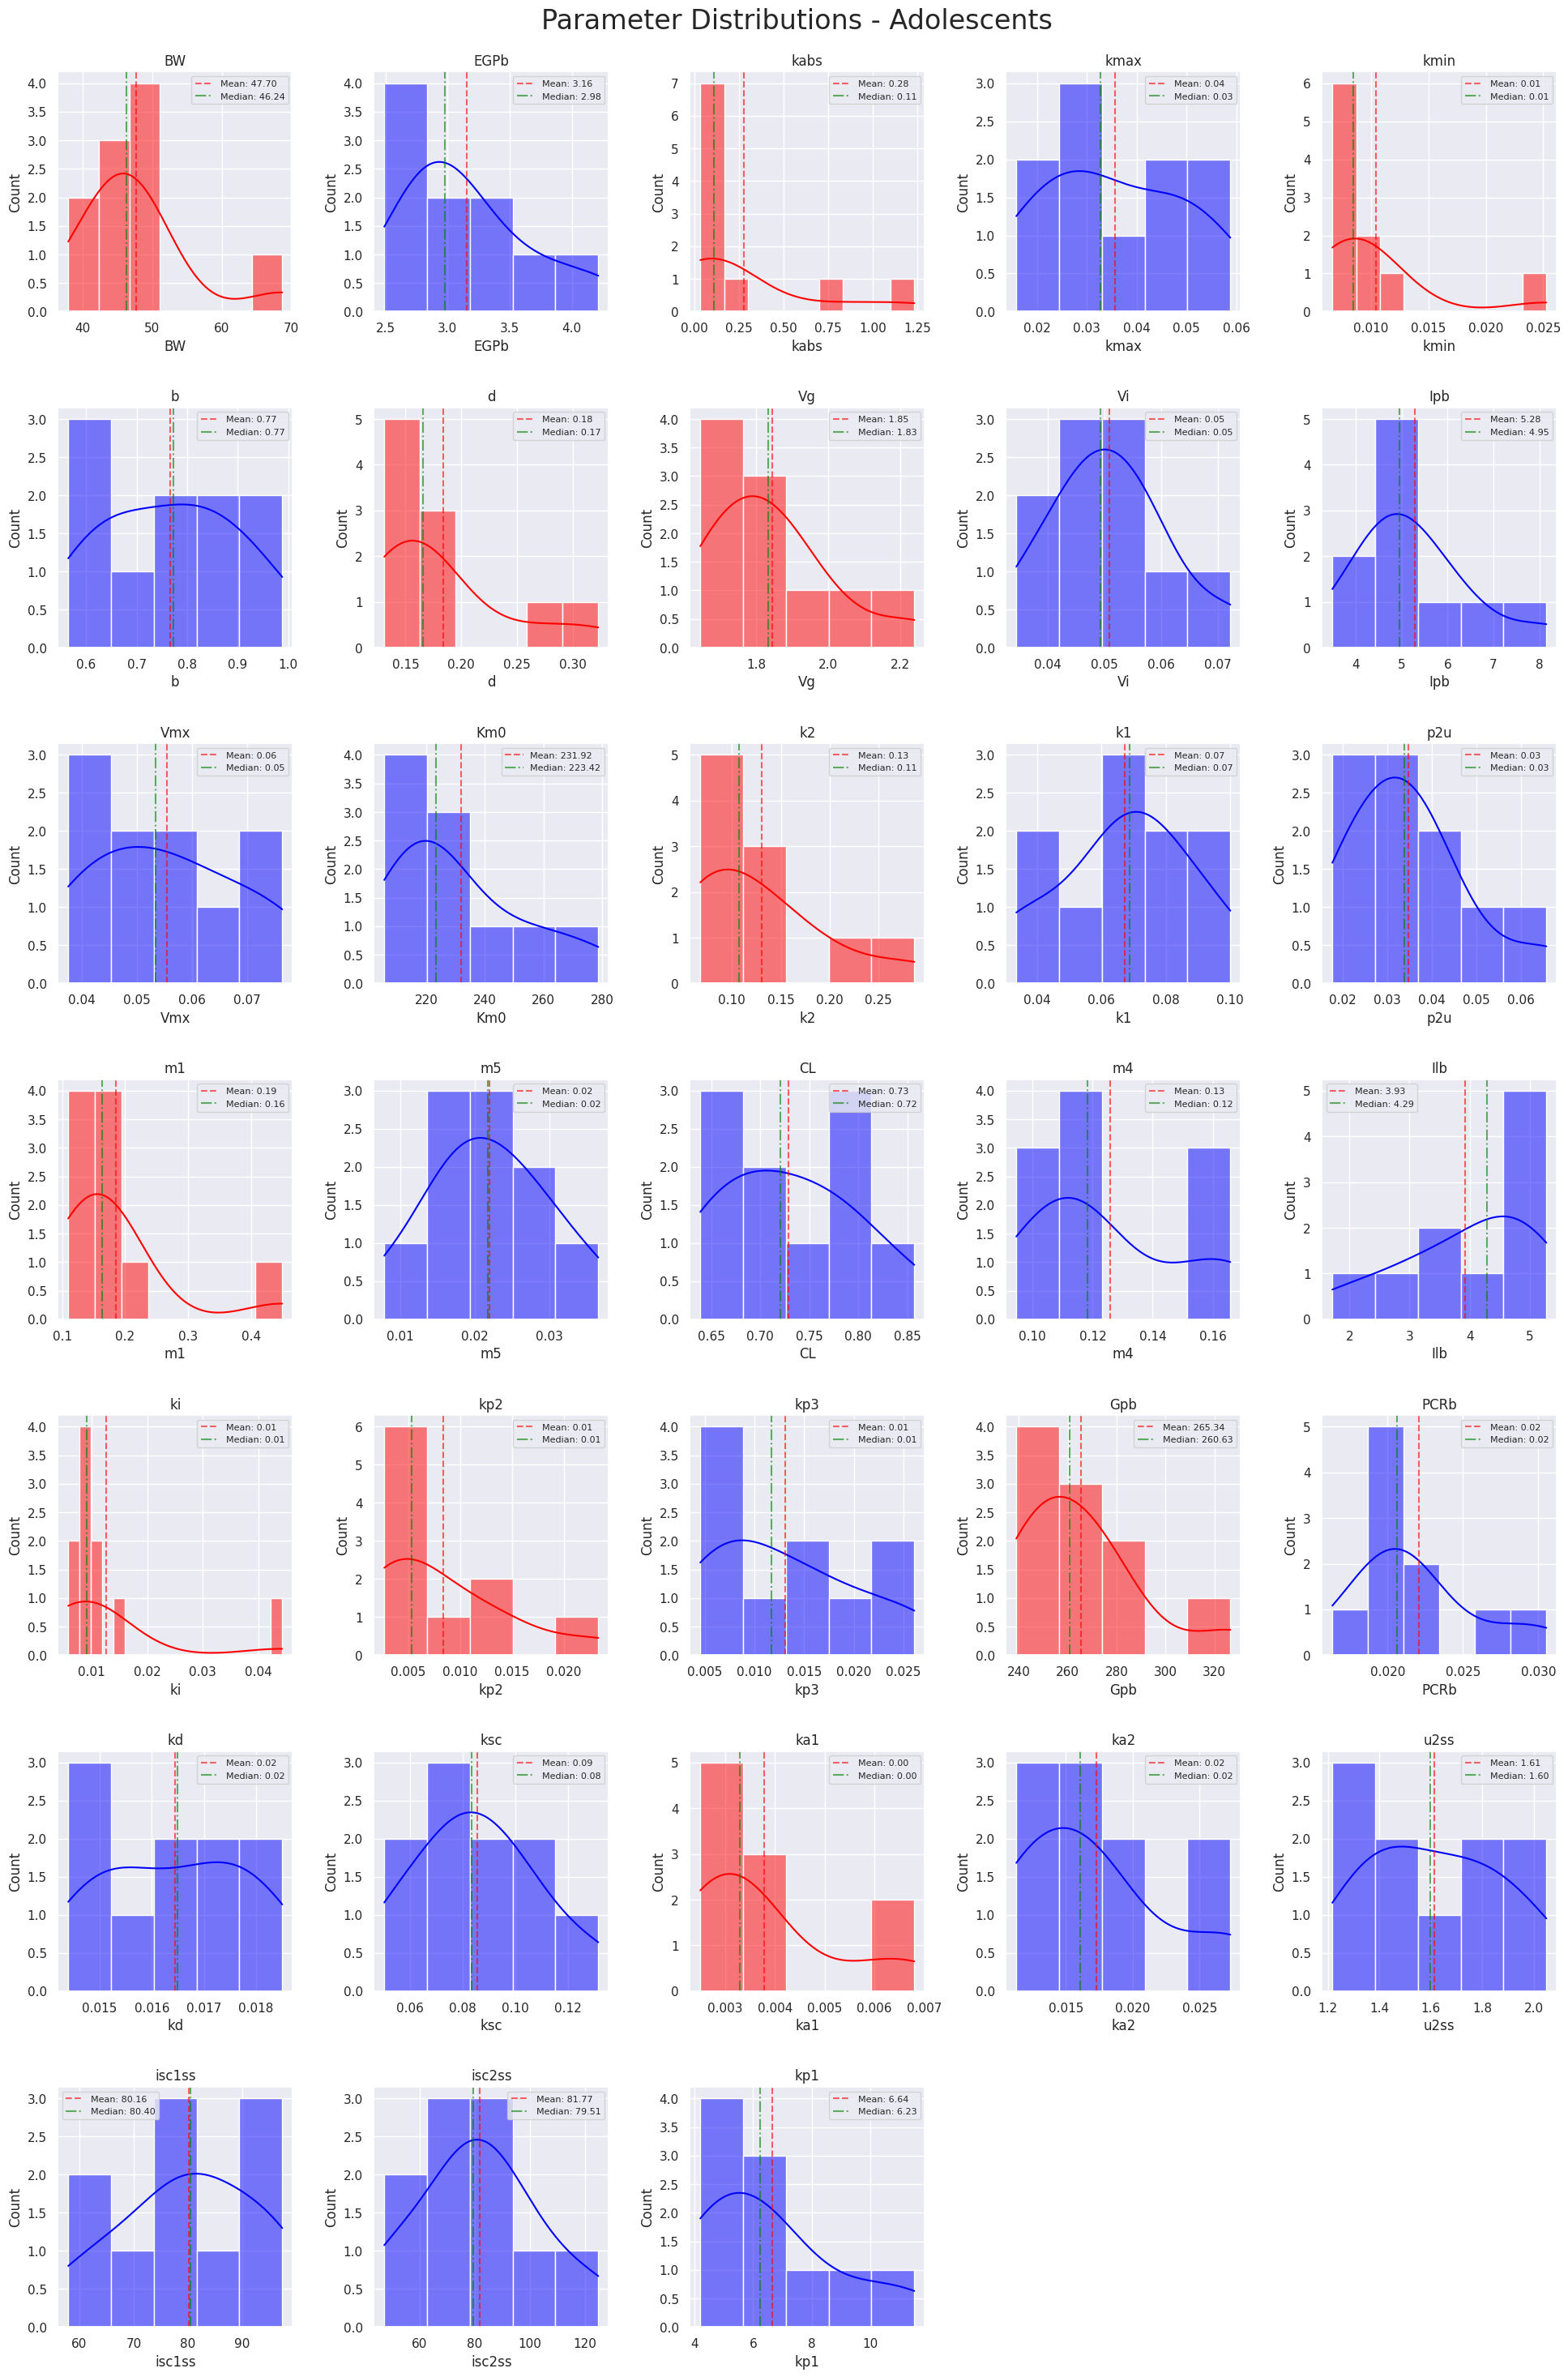

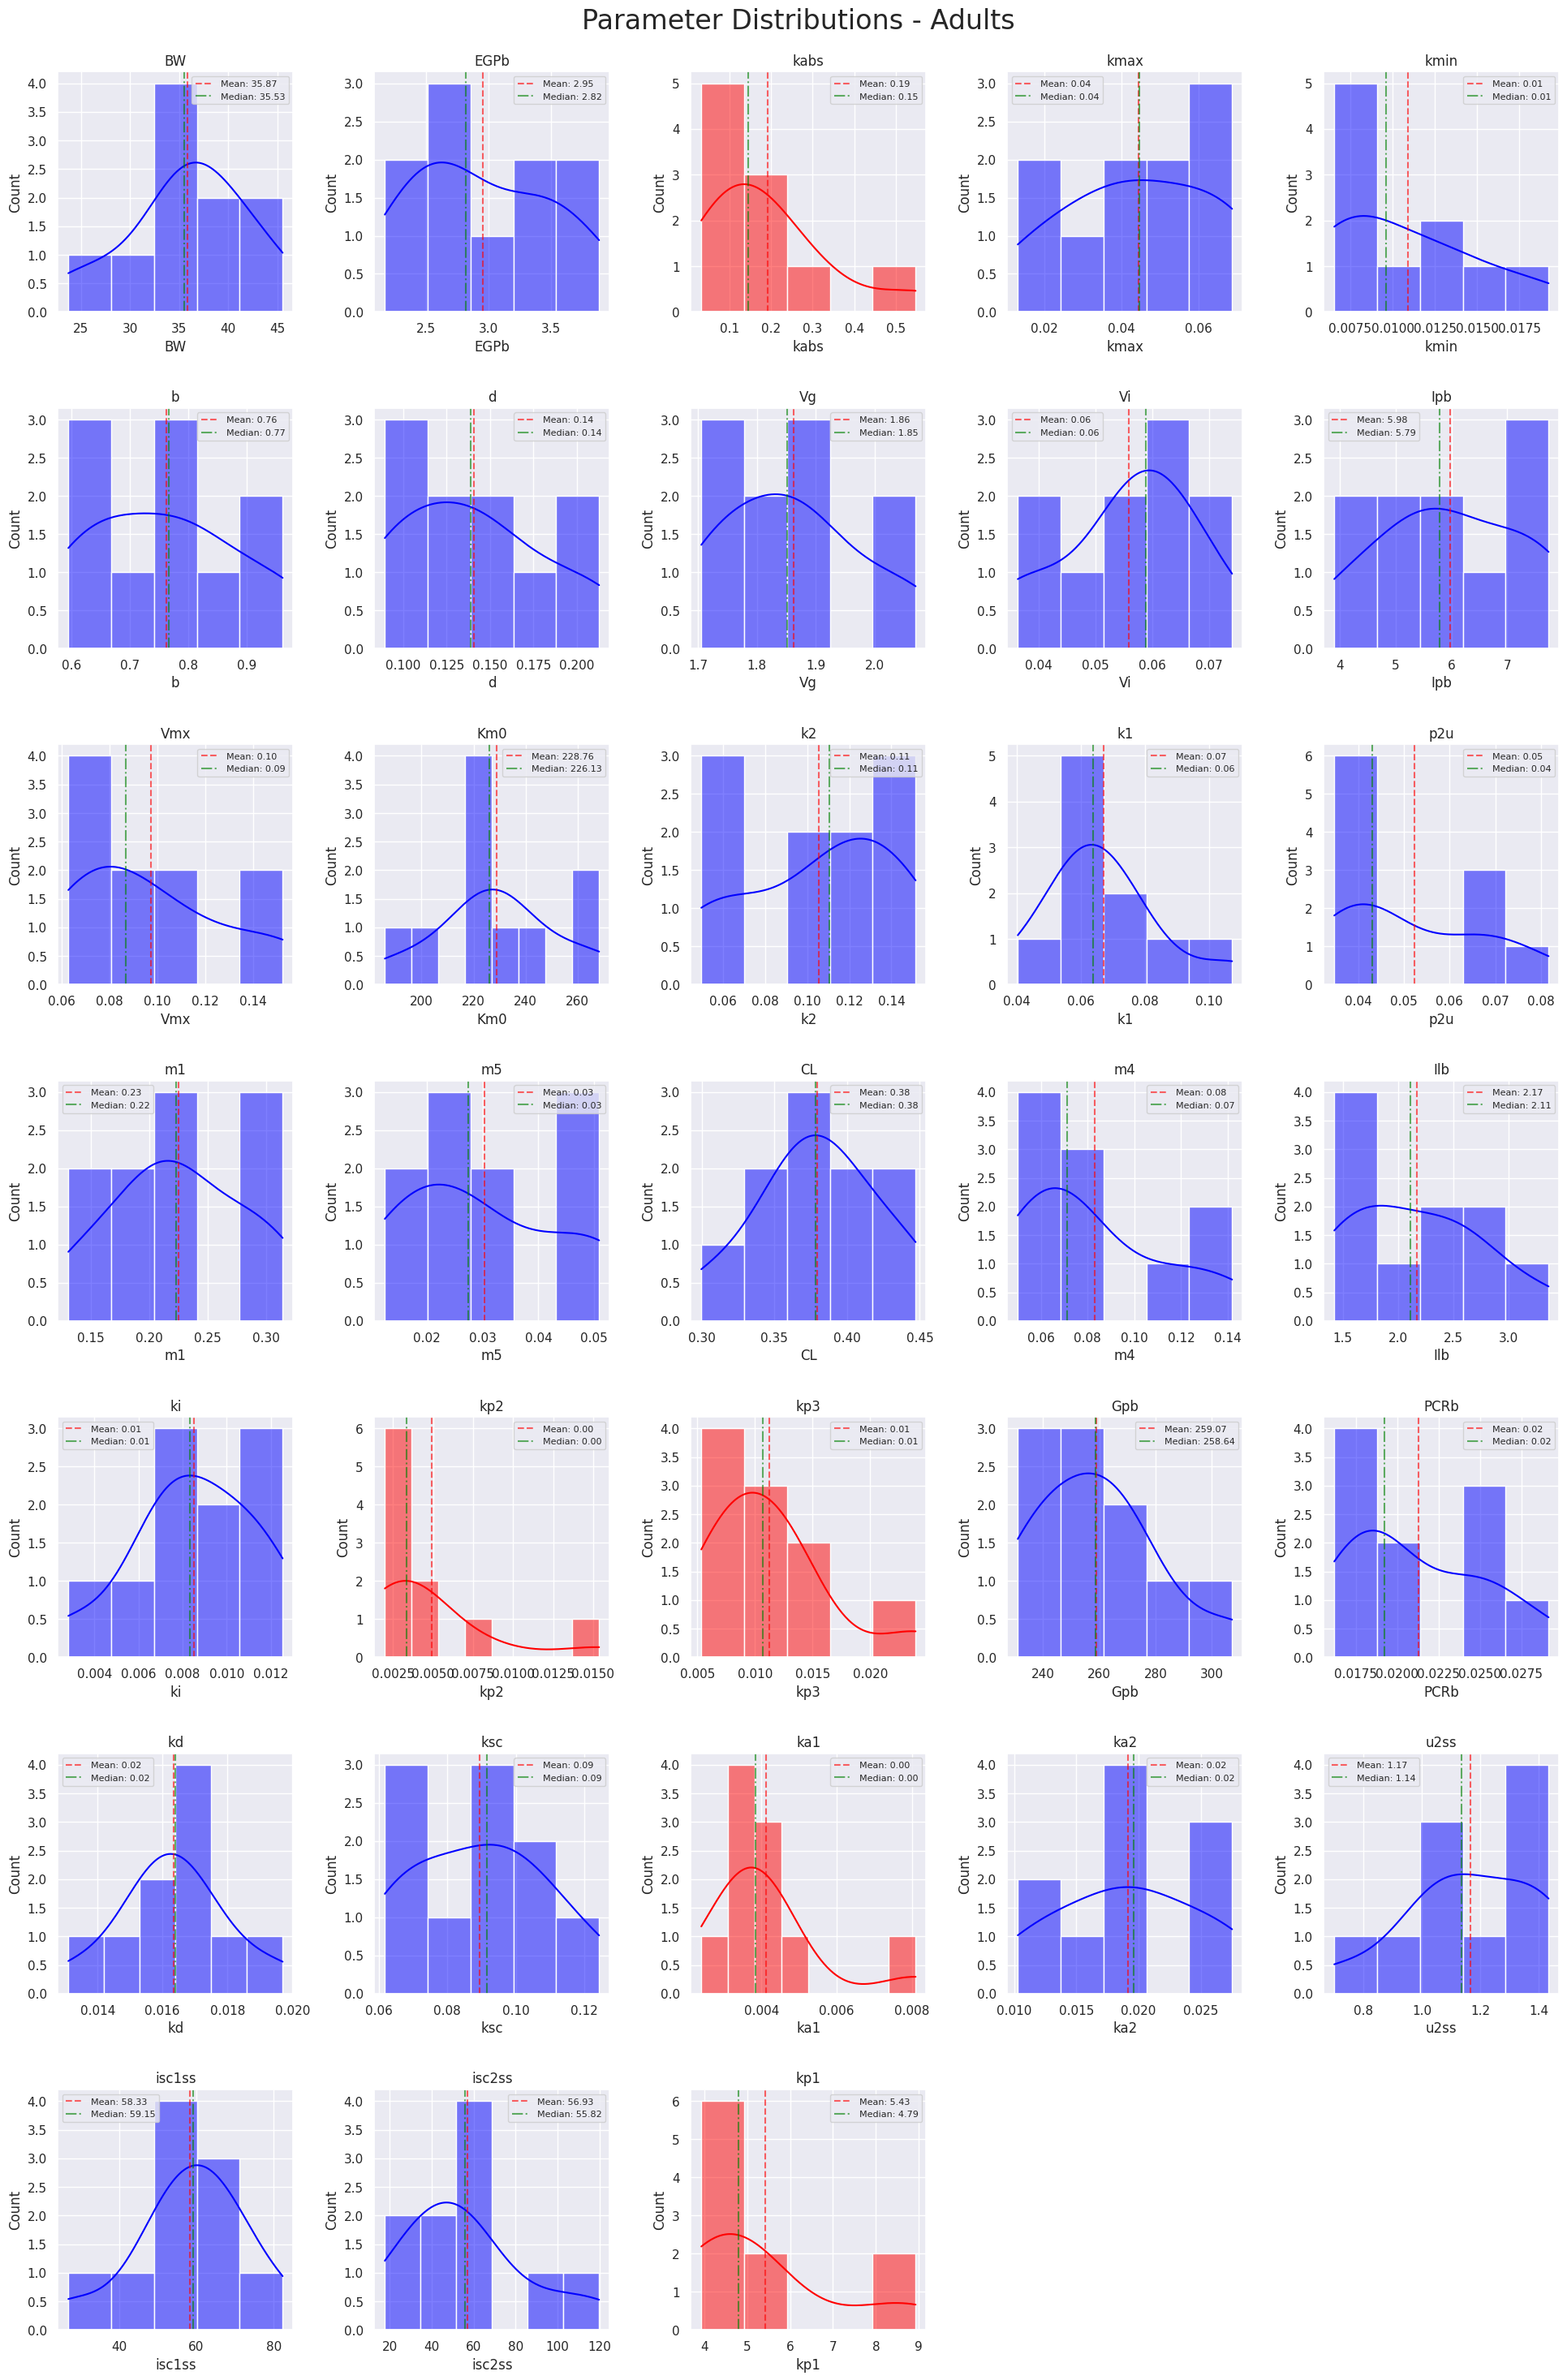

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, uniform, gamma

def plot_parameter_histograms(data, title, columns_list='all', figsize=(20, 30), cols=5):
    """
    Creates a grid of histograms for the specified columns in the dataset.
    
    Parameters:
    data (DataFrame): The DataFrame containing the parameters
    title (str): Title for the entire figure
    columns_list (list): List of columns to plot
    figsize (tuple): Figure size
    cols (int): Number of columns in the grid
    """
    sns.set_theme(style="darkgrid")
    # If columns_list is 'all', use all columns in the DataFrame
    if columns_list == 'all':
        columns_list = data.columns.tolist()
    # Calculate number of rows needed
    rows = int(np.ceil(len(columns_list) / cols))
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(title, fontsize=24, y=0.98)
    fig.tight_layout(pad=3.0)
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten() if rows > 1 else [axes]
    
    # Plot each histogram
    for i, col in enumerate(columns_list):
        # Skip if column doesn't exist
        if col not in data.columns:
            continue
            
        # Determine appropriate bins
        try:
            # Get the data and determine if it's skewed
            values = data[col].dropna()
            is_skewed = abs(stats.skew(values)) > 1
            
            # Set color based on skewness
            if is_skewed:
                color = 'red'
            else:
                color = 'blue'
            
                            
            # Create histogram
            sns.histplot(values, kde=True, ax=axes[i], color=color)
            
            axes[i].set_title(f'{col}', fontsize=12)
            
            # Add statistical details
            mean = values.mean()
            median = values.median()
            std = values.std()
            axes[i].axvline(mean, color='red', linestyle='--', alpha=0.6, label=f'Mean: {mean:.2f}')
            axes[i].axvline(median, color='green', linestyle='-.', alpha=0.6, label=f'Median: {median:.2f}')
            
            # Add legend
            axes[i].legend(fontsize=8)
            
        except Exception as e:
            print(f"Error plotting {col}: {e}")
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.subplots_adjust(hspace=0.4)
    plt.show()

# Now create the sets of plots
# Child subset
plot_parameter_histograms(df_adult[covariance_analysis_columns], "Parameter Distributions - Children")

# Adolescent subset
plot_parameter_histograms(df_adole[covariance_analysis_columns], "Parameter Distributions - Adolescents")

# Adult subset
plot_parameter_histograms(df_child[covariance_analysis_columns], "Parameter Distributions - Adults") 

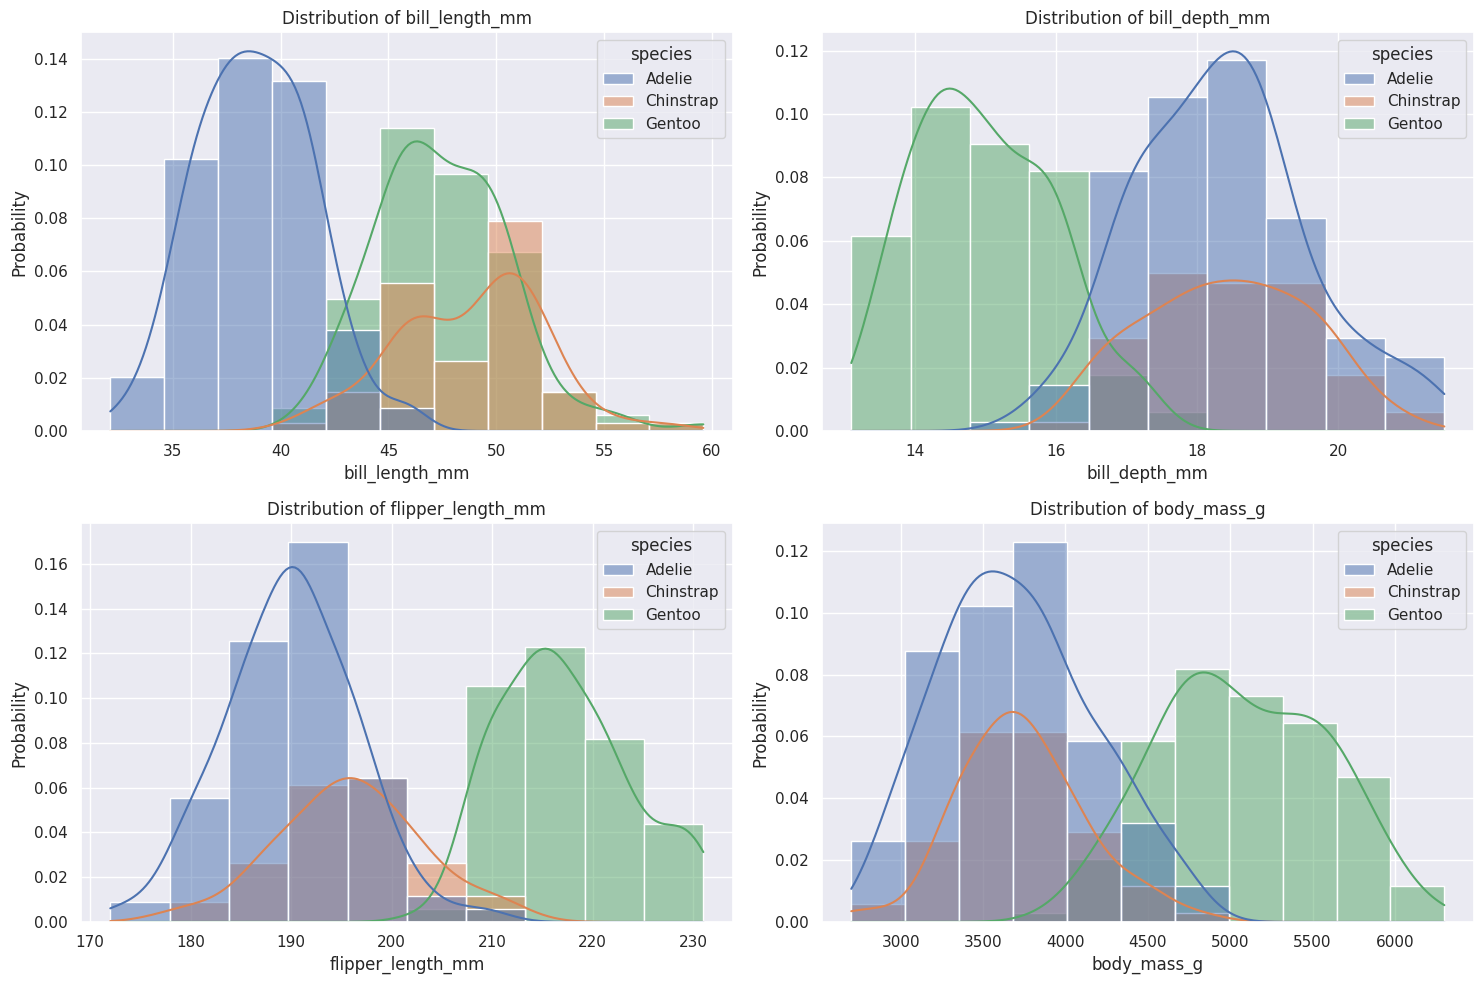

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_distribution_grid(data, category_col='category', n_cols=4, figsize=(15, 10)):
    """
    Create a grid of distribution plots for all numeric columns with appropriate scales.
    """
    # Set Seaborn style for the classic look
    sns.set_theme(style="darkgrid")  # This gives the gray background with white grid lines
    
    # Get numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove category column if it's numeric
    if category_col in numeric_cols:
        numeric_cols.remove(category_col)
    
    # Calculate grid dimensions
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    
    # Create figure and axes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    # Create a plot for each numeric column
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            # Create distribution plot on its own axis with its own scale
            sns.histplot(
                data=data,
                x=col,
                hue=category_col,
                kde=True,
                stat="probability",
                ax=axes[i]
            )
            axes[i].set_title(f'Distribution of {col}')
            
    # Hide unused subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
        
    plt.tight_layout()
    return fig

# Example usage:
penguin_df = sns.load_dataset("penguins")
g = create_distribution_grid(penguin_df, category_col='species', n_cols=2)
plt.tight_layout()
plt.show()


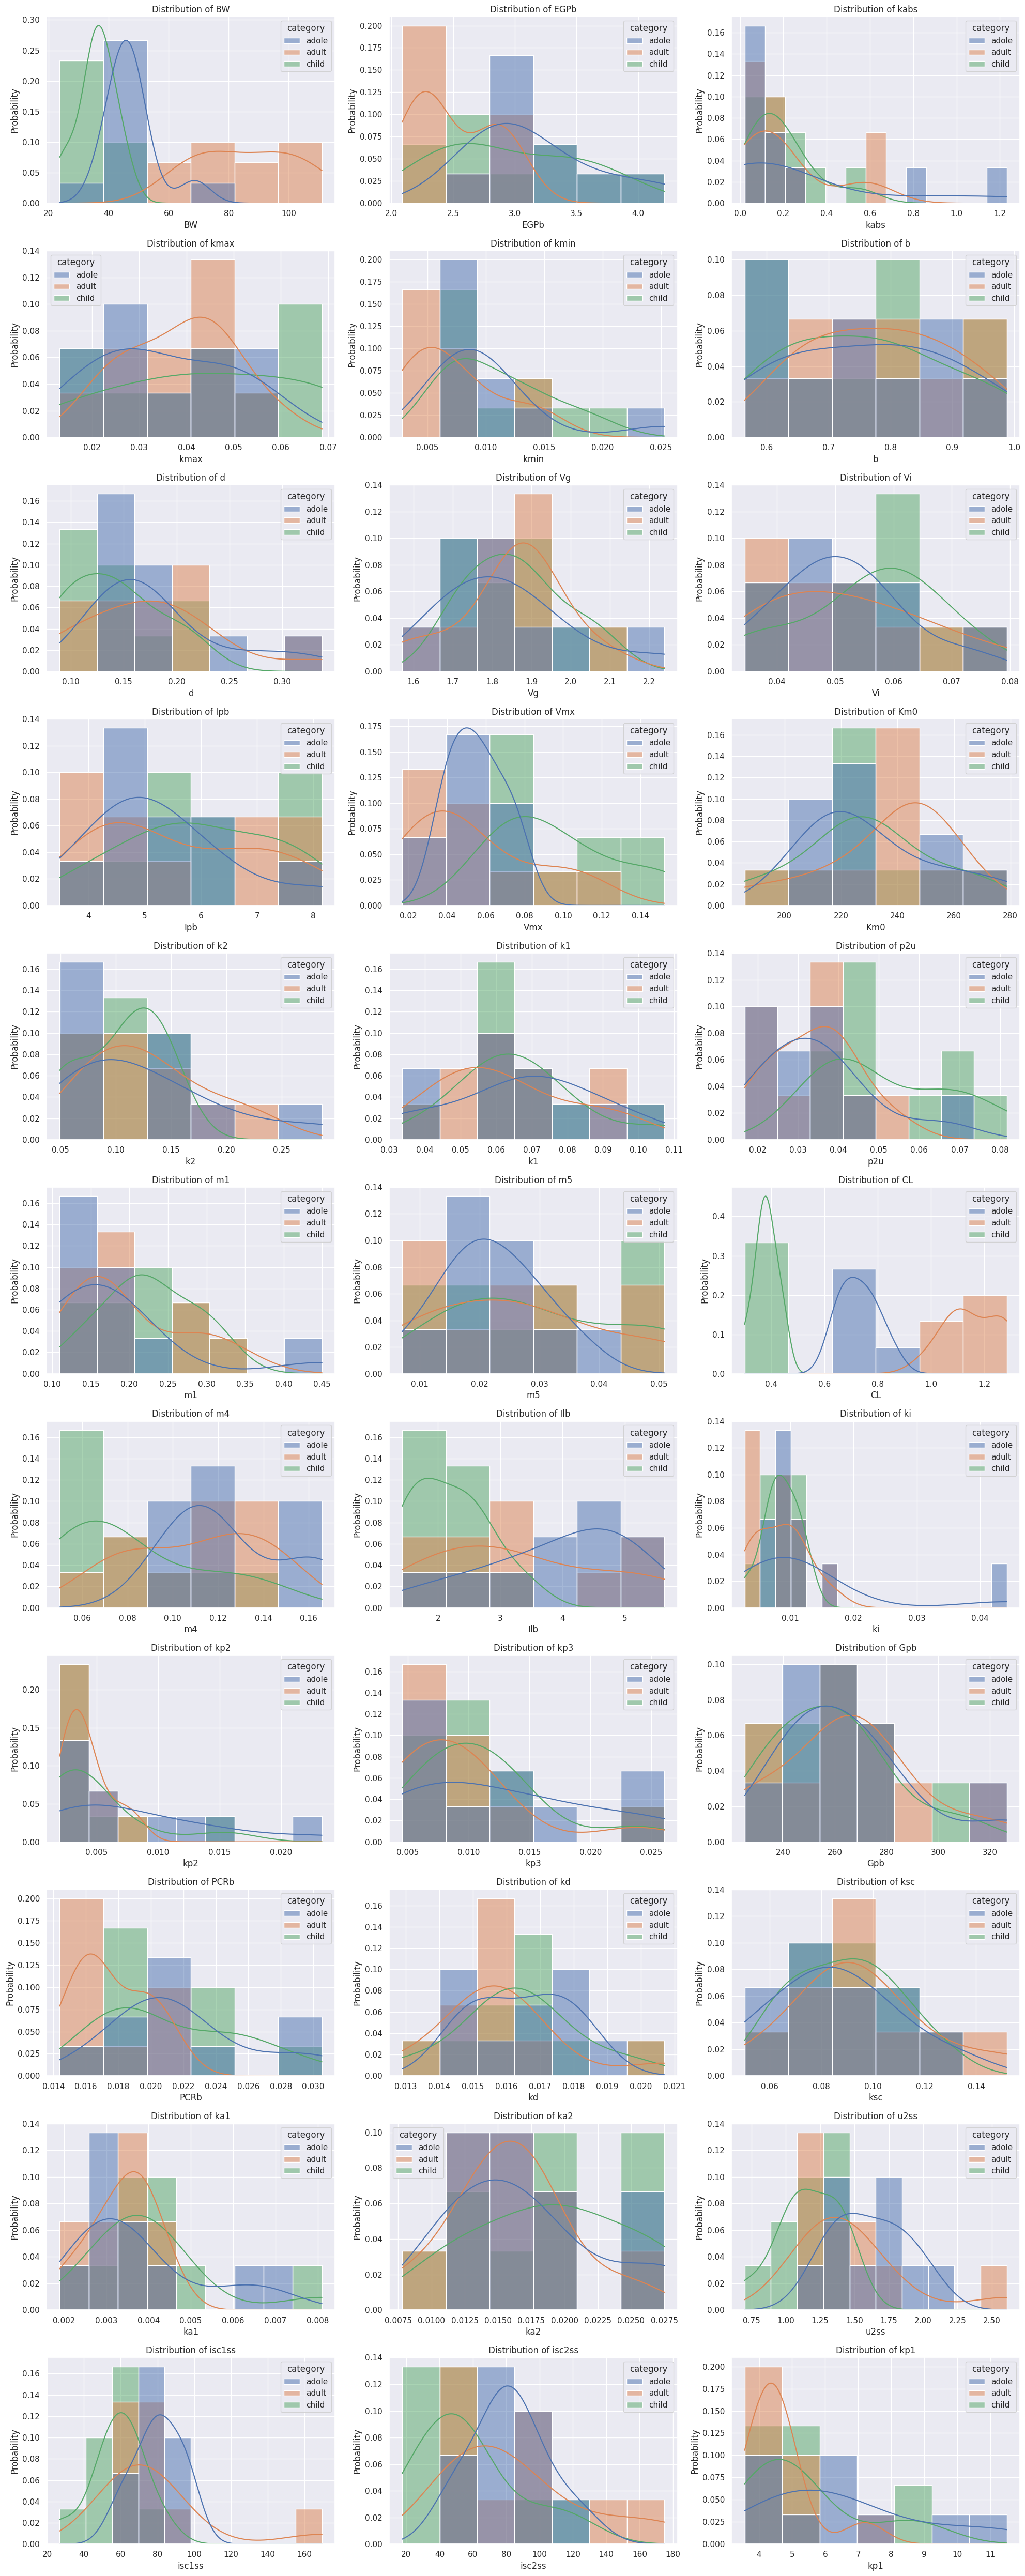

In [55]:
templist = ['category'] + covariance_analysis_columns
g = create_distribution_grid(df[templist], category_col='category', n_cols=3, figsize=(20, 50))
plt.tight_layout()
plt.show()


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def create_scaled_pairplot(data, category_column='category', 
                          transform='standard', plot_kwargs=None, 
                          diag_kind='kde', figsize=(12, 10)):
    """
    Create a pairplot with appropriate scaling for variables of different magnitudes.
    
    Parameters:
    -----------
    data : pandas DataFrame
        The dataset to visualize
    category_column : str
        Column name containing categorical values (e.g., 'adult', 'child', 'adolescent')
    transform : str
        Transformation to apply: 'standard' (z-score), 'log', 'sqrt', 'none'
    plot_kwargs : dict
        Additional arguments for the scatter plots
    diag_kind : str
        Plot type for diagonal: 'kde', 'hist'
    figsize : tuple
        Figure size
    
    Returns:
    --------
    g : seaborn PairGrid
        The pairplot object
    """
    # Set the default Seaborn style - gives the gray grid background
    sns.set_theme(style="darkgrid")
    
    # Create a copy of the data to avoid modifying the original
    df = data.copy()
    
    # Get numeric columns (exclude the category column)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if category_column in numeric_cols:
        numeric_cols.remove(category_column)
    
    # Apply transformation based on user selection
    if transform == 'standard':
        # Z-score standardization
        scaler = StandardScaler()
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
        title = "Z-score Standardized Pairplot"
    
    elif transform == 'log':
        # Log transformation (add 1 to handle zeros)
        for col in numeric_cols:
            if (df[col] >= 0).all():
                df[col] = np.log1p(df[col])
        title = "Log-transformed Pairplot"
    
    elif transform == 'sqrt':
        # Square root transformation
        for col in numeric_cols:
            if (df[col] >= 0).all():
                df[col] = np.sqrt(df[col])
        title = "Square Root-transformed Pairplot"
    
    else:  # 'none'
        title = "Original Scale Pairplot"
    
    # Default plot parameters
    if plot_kwargs is None:
        plot_kwargs = {
            'alpha': 0.6,         
        }
    
    # Create the pairplot
    g = sns.pairplot(
        df,
        vars=numeric_cols,
        hue=category_column,
        diag_kind=diag_kind,
        plot_kws=plot_kwargs,
        kind='kde',
        height=2.5,
        aspect=1,
        corner=False  # Only show the lower triangle
    )
    
    # Adjust title and layout
    g.fig.suptitle(title, y=1.02, fontsize=16)
    g.fig.set_size_inches(figsize)
    plt.tight_layout()
    
    return g

# Example usage:
#penguin_df = sns.load_dataset("penguins")  # Your dataframe with numeric columns and a 'category' column
 
# Try different transformations
#g1 = create_scaled_pairplot(penguin_df, category_column='species', transform='standard')
#g2 = create_scaled_pairplot(penguin_df, category_column='species', transform='log')
#g3 = create_scaled_pairplot(penguin_df, category_column='species', transform='sqrt')

plt.show()

In [ ]:
g1 = create_scaled_pairplot(df[templist], category_column='category', transform='standard', figsize=(40, 40))
plt.show()

In [ ]:
from copulas.datasets import sample_univariate_beta

data = sample_univariate_beta()
data.head()



0    4.796025
1    4.935189
2    4.637677
3    4.945320
4    4.726815
dtype: float64

In [ ]:
from copulas.visualization import dist_1d

dist_1d(data)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'fill': 'tozeroy',
              'hovertemplate': '<b>None</b><br>Frequency: %{y}<extra></extra>',
              'marker': {'color': '#000036'},
              'mode': 'lines',
              'showlegend': True,
              'type': 'scatter',
              'x': [4.095558923695414, 4.097367775469376, 4.099176627243337, ...,
                    4.994558255354367, 4.996367107128329, 4.998175958902291],
              'xaxis': 'x',
              'y': {'bdata': ('mKjTTSqYpT/1OKlaZFimP5tSyoF8HK' ... 'Ox6vk/JiaDx9lM+T+n6KWCQ634Pw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'overlay',
               'font': {'size': 18},
               'hovermode': 'closest',
               'legend': {'traceorder': 'reversed'},
               'plot_bgcolor': '#F5F5F8',
               'showlegend': False,
               'template': '...',
               'title': {'text': 'Data'},
               'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'title': {'text': 'value'}, 'zeroline': False},
               'yaxis': {'anchor': 'free', 'domain': [0.0, 1], 'position': 0.0, 'title': {'text': 'frequency'}}}
})

In [ ]:
def plot_parameter_comparison(columns_list=keep_columns[:12], figsize=(20, 25), cols=3):
    """
    Creates a grid of histograms comparing the same parameter across different age groups
    """
    # Calculate number of rows needed
    rows = int(np.ceil(len(columns_list) / cols))
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle("Parameter Distribution Comparison Across Age Groups", fontsize=24, y=0.98)
    fig.tight_layout(pad=4.0)
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    # Color scheme for age groups
    colors = {'adult': 'navy', 'adole': 'darkorange', 'child': 'forestgreen'}
    
    # Plot each histogram
    for i, col in enumerate(columns_list):
        # Create KDE plot for each age group
        for name, data, color in [('Adults', df_adult, colors['adult']), 
                                 ('Adolescents', df_adole, colors['adole']), 
                                 ('Children', df_child, colors['child'])]:
            if col in data.columns:
                sns.kdeplot(data[col].dropna(), label=name, ax=axes[i], 
                           color=color, fill=True, alpha=0.3)
        
        axes[i].set_title(f'{col}', fontsize=14)
        axes[i].legend(fontsize=8)
        
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.subplots_adjust(hspace=0.4)
    plt.show()

# Plot the comparison (showing first 12 parameters for clarity)
plot_parameter_comparison()

# To show all parameters, use:
# plot_parameter_comparison(keep_columns)

NameError: name 'keep_columns' is not defined

In [ ]:
normal_dist_columns = ['BW', 'Gb', 'Ib', 'Vg', 'lpb', 'Km0', 'Gpb', 'isc2ss']
uniform_dist_columns = ['EGPb', 'kmax', 'kmin', 'b', 'd', 'k2', 'p2u', 'CL', 'm2','m5','Ilb','kd', 'ka1', 'ka2']
skew_dist_columns = ['kabs', 'Vi', 'Vmx', 'k1', 'm1', 'm5', 'm30', 'ki', 'kp2', 'kp3', 'Gtb', 'Vm0', 'Rdb', 'PCRb', 'ksc','u2ss','isc1ss', 'kp1']

In [ ]:
# Function to fit distributions to your data
def fit_distributions(data, columns):
    distributions = {}
    for col in columns:
        # You can customize this based on your data characteristics
        if col in normal_dist_columns:
            # Fit normal distribution
            params = stats.norm.fit(data[col])
            distributions[col] = {'dist': 'norm', 'params': params}
        elif col in uniform_dist_columns:
            # Fit uniform distribution
            params = stats.uniform.fit(data[col])
            distributions[col] = {'dist': 'uniform', 'params': params}
        elif col in skew_dist_columns:
            # Fit gamma distribution for skewed data
            params = stats.gamma.fit(data[col])
            distributions[col] = {'dist': 'gamma', 'params': params}
    return distributions

# Function to generate data using Gaussian copula
def generate_with_copula(correlation_matrix, distributions, num_samples=333):
    # 1. Generate multivariate normal samples with the given correlation
    n_vars = correlation_matrix.shape[0]
    mvn_samples = np.random.multivariate_normal(
        mean=np.zeros(n_vars),
        cov=correlation_matrix,
        size=num_samples
    )
    
    # 2. Transform to uniform samples using the normal CDF
    uniform_samples = stats.norm.cdf(mvn_samples)
    
    # 3. Apply inverse CDF of each marginal distribution
    result = np.zeros_like(uniform_samples)
    for i, col in enumerate(distributions.keys()):
        dist_info = distributions[col]
        if dist_info['dist'] == 'norm':
            mu, sigma = dist_info['params']
            result[:, i] = stats.norm.ppf(uniform_samples[:, i], loc=mu, scale=sigma)
        elif dist_info['dist'] == 'uniform':
            a, b = dist_info['params']
            result[:, i] = stats.uniform.ppf(uniform_samples[:, i], loc=a, scale=b-a)
        elif dist_info['dist'] == 'gamma':
            a, loc, scale = dist_info['params']
            result[:, i] = stats.gamma.ppf(uniform_samples[:, i], a, loc=loc, scale=scale)
    
    return pd.DataFrame(result, columns=list(distributions.keys()))

# Use the functions
# 1. Fit distributions to your adult data
distributions = fit_distributions(df_adult, keep_columns)

# 2. Generate new samples using copula
new_samples = generate_with_copula(
    correlation_matrix=corr_adult.values,
    distributions=distributions,
    num_samples=333
)

# 3. Validate the correlations
new_corr = new_samples.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(new_corr, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Copula-Generated Data")
plt.show()

# 4. Compare distributions
for col in keep_columns[:4]:  # Plot first few columns as example
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_adult[col], kde=True)
    plt.title(f"Original {col} Distribution")
    
    plt.subplot(1, 2, 2)
    sns.histplot(new_samples[col], kde=True)
    plt.title(f"Generated {col} Distribution")
    plt.tight_layout()
    plt.show()

# 5. Save the new samples
new_samples.to_csv('/home/cjrisi/Projects/diabetes/simglucose/simglucose/params/vpatient_params_copula.csv', index=False)

ValueError: Shape of passed values is (333, 40), indices imply (333, 38)